# Forcasting Part , This data has also 4 Type of Data 
## 3: Last Part ( Importent part of the Analysis)
#### This part contain very big Data, all the problem that I getting from this data because it has also important Data inside , which I need for whole process, I can not ignore One Data for getting a perfect result. 

#### This is the challenging part . After dooing Join and further analysis it gives me same error as in the satrating fase of doing all things so I have decided on this doing all the things seperatly, and Taking only the neccesary Data and comine Them for <u> Ml Part- Time Serie </u>


##### 1. Workers Hours Part.
##### 2. Voucher and Discounts.
##### 3. Sales .
##### 4. Statistic, which will be teh Machine Learning Part.(Time Series)

### Before I started to do Further , I need to Instal so pamy Libraries which was noct done Befor.



        






## Lets Process Further

In [3]:
import pandas as pd
import numpy as np
import os
import os.path
import xlrd
import xlsxwriter


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, fbeta_score
from collections import Counter
from xgboost import plot_importance, XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, cross_validate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import polars as pl

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Install missing packages
try:
    from statsforecast import StatsForecast
    from statsforecast.models import AutoARIMA
except ImportError:
    #!pip install statsforecast
    from statsforecast import StatsForecast
    from statsforecast.models import AutoARIMA

try:
    from pmdarima import auto_arima
except ImportError:
   # !pip install pmdarima
    from pmdarima import auto_arima

try:
    from mlforecast import MLForecast
    from mlforecast.target_transforms import Differences
except ImportError:
    #!pip install mlforecast
    from mlforecast import MLForecast
    from mlforecast.target_transforms import Differences

try:
    import lightgbm as lgb
except ImportError:
    #!pip install lightgbm
    import lightgbm as lgb

try:
    import xgboost as xgb
except ImportError:
    #!pip install xgboost
    import xgboost as xgb

from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [5]:
#pip install polars

In [6]:
#pip install openpyxl


In [7]:
#ip install pandas openpyxl polars


In [8]:
#pip install xlsx2csv


In [9]:
#pip install altair vega_datasets


In [10]:
#pip install statsforecast

## Objectives:

### 1.Daily Sales Overview . (From Umsatzt Part)




In [6]:

df = pl.read_excel("Umsatzt.xlsx")

In [7]:
df

Datum,Uhrzeit,X-Abschlag Nummer,Wechselgeld morgens,Wechselgeld letzter Abschlag,Wechselgeld aktuell,Wechselgeld Differenz,Entnahmen Scheine,Entnahmen Hartgeld,Summe Ausgaben,Kartenzahlung,Bar,Ist Einnahmen,Soll Einnahmen,Entnahme Differenz,Kassen Differenz,Mitarbeitername
str,str,i64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""01.01.2023""","""01.01.2023""",116,300.0,300.0,300.0,0.0,385,0.4,0.0,424.6,810.0,810.0,809.4,0.6,0.6,"""Thomas Braun"""
"""02.01.2023""","""02.01.2023""",117,300.4,300.0,622.15,322.15,420,2.15,0.0,710.1,1132.25,1132.25,1005.7,126.55,448.7,"""Matthias Braun"""
"""03.01.2023""","""03.01.2023""",118,200.15,622.15,545.75,-76.4,245,0.75,0.0,590.86,836.61,836.61,924.9,-88.29,-164.69,"""Matthias Braun"""
"""04.01.2023""","""04.01.2023""",119,300.0,545.75,300.0,-245.75,295,5.25,0.0,882.31,1182.56,1182.56,1171.72,10.84,-234.91,"""Nina Korczykowski"""
"""05.01.2023""","""05.01.2023""",120,300.0,300.0,300.0,0.0,340,0.95,7.68,681.48,1022.43,1030.11,1020.56,9.55,9.55,"""Clara Wilges"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""27.12.2023""","""27.12.2023""",478,300.0,300.0,300.0,0.0,280,0.75,41.66,757.24,1037.99,1079.65,1125.7,-46.05,-46.05,"""Rupa Lamichane"""
"""28.12.2023""","""28.12.2023""",479,300.0,300.0,300.0,0.0,365,19.8,25.0,708.66,1093.46,1118.46,1117.52,0.94,0.94,"""Rupa Lamichane"""
"""29.12.2023""","""29.12.2023""",480,299.0,300.0,300.0,0.0,440,0.0,0.0,962.64,1402.64,1402.64,1402.28,0.36,0.36,"""Prakash Neupane"""


In [8]:
df.columns

['Datum',
 'Uhrzeit',
 'X-Abschlag Nummer',
 'Wechselgeld morgens',
 'Wechselgeld letzter Abschlag',
 'Wechselgeld aktuell',
 'Wechselgeld Differenz',
 'Entnahmen Scheine',
 'Entnahmen Hartgeld',
 'Summe Ausgaben',
 'Kartenzahlung',
 'Bar',
 'Ist Einnahmen',
 'Soll Einnahmen',
 'Entnahme Differenz',
 'Kassen Differenz',
 'Mitarbeitername']

In [9]:
DailySalesTable = df[['Datum','Uhrzeit','Summe Ausgaben','Kartenzahlung','Bar','Entnahme Differenz','Kassen Differenz','Mitarbeitername']]
DailySalesTable

Datum,Uhrzeit,Summe Ausgaben,Kartenzahlung,Bar,Entnahme Differenz,Kassen Differenz,Mitarbeitername
str,str,f64,f64,f64,f64,f64,str
"""01.01.2023""","""01.01.2023""",0.0,424.6,810.0,0.6,0.6,"""Thomas Braun"""
"""02.01.2023""","""02.01.2023""",0.0,710.1,1132.25,126.55,448.7,"""Matthias Braun"""
"""03.01.2023""","""03.01.2023""",0.0,590.86,836.61,-88.29,-164.69,"""Matthias Braun"""
"""04.01.2023""","""04.01.2023""",0.0,882.31,1182.56,10.84,-234.91,"""Nina Korczykowski"""
"""05.01.2023""","""05.01.2023""",7.68,681.48,1022.43,9.55,9.55,"""Clara Wilges"""
…,…,…,…,…,…,…,…
"""27.12.2023""","""27.12.2023""",41.66,757.24,1037.99,-46.05,-46.05,"""Rupa Lamichane"""
"""28.12.2023""","""28.12.2023""",25.0,708.66,1093.46,0.94,0.94,"""Rupa Lamichane"""
"""29.12.2023""","""29.12.2023""",0.0,962.64,1402.64,0.36,0.36,"""Prakash Neupane"""


In [10]:
df1 = pl.read_excel("Tages-Ubersicht.xlsx")
df1

Datum,Umsatz,Umsatz zu MwSt 0% (DE ),Umsatz zu MwSt 7% (DE ),Umsatz zu MwSt 19% (DE ),Anzahl Kunden,Erster Verkauf,Letzter Verkauf,Storno Wert,Betrag gel. Zeilen,Betrag gel. Bons,Einnahme BAR,Einnahme EC-CASH,Kassen Differenz
str,f64,f64,f64,f64,i64,str,str,f64,f64,f64,f64,f64,f64
"""01.01.2023""",809.4,3.58,576.0,229.82,122,"""08:45:07""","""16:00:35""",null,22.5,0.5,384.8,424.6,0.6
"""02.01.2023""",1005.7,2.92,805.7,197.08,154,"""06:10:29""","""19:53:26""",null,21.1,29.3,295.6,710.1,126.55
"""03.01.2023""",924.9,1.61,773.49,149.8,164,"""06:02:29""","""18:47:07""",null,9.6,11.0,334.04,590.86,-88.29
"""04.01.2023""",1171.72,2.22,1006.72,162.78,194,"""06:03:15""","""19:39:18""",null,9.9,40.0,289.41,882.31,10.84
"""05.01.2023""",1020.56,1.31,859.78,159.47,171,"""07:08:32""","""19:39:54""",null,null,23.57,339.08,681.48,9.55
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""27.12.2023""",1125.7,0.0,758.53,367.17,177,"""06:26:11""","""18:46:45""",null,8.5,19.51,368.46,757.24,-46.05
"""28.12.2023""",1117.52,-0.5,799.77,318.25,177,"""06:01:28""","""19:33:43""",null,null,27.9,408.86,708.66,0.94
"""29.12.2023""",1402.28,0.0,1010.64,391.64,195,"""06:15:39""","""19:37:00""",null,31.75,32.4,439.64,962.64,0.36


In [11]:
df1.columns

['Datum',
 'Umsatz',
 'Umsatz zu MwSt 0% (DE )',
 'Umsatz zu MwSt 7% (DE )',
 'Umsatz zu MwSt 19% (DE )',
 'Anzahl Kunden',
 'Erster Verkauf',
 'Letzter Verkauf',
 'Storno Wert',
 'Betrag gel. Zeilen',
 'Betrag gel. Bons',
 'Einnahme BAR',
 'Einnahme EC-CASH',
 'Kassen Differenz']

In [12]:
Daybook =df1['Datum',
 'Umsatz',
 'Umsatz zu MwSt 0% (DE )',
 'Umsatz zu MwSt 7% (DE )',
 'Umsatz zu MwSt 19% (DE )',
 'Anzahl Kunden',
 'Erster Verkauf',
 'Letzter Verkauf',
 'Storno Wert',
 'Kassen Differenz']
Daybook

Datum,Umsatz,Umsatz zu MwSt 0% (DE ),Umsatz zu MwSt 7% (DE ),Umsatz zu MwSt 19% (DE ),Anzahl Kunden,Erster Verkauf,Letzter Verkauf,Storno Wert,Kassen Differenz
str,f64,f64,f64,f64,i64,str,str,f64,f64
"""01.01.2023""",809.4,3.58,576.0,229.82,122,"""08:45:07""","""16:00:35""",null,0.6
"""02.01.2023""",1005.7,2.92,805.7,197.08,154,"""06:10:29""","""19:53:26""",null,126.55
"""03.01.2023""",924.9,1.61,773.49,149.8,164,"""06:02:29""","""18:47:07""",null,-88.29
"""04.01.2023""",1171.72,2.22,1006.72,162.78,194,"""06:03:15""","""19:39:18""",null,10.84
"""05.01.2023""",1020.56,1.31,859.78,159.47,171,"""07:08:32""","""19:39:54""",null,9.55
…,…,…,…,…,…,…,…,…,…
"""27.12.2023""",1125.7,0.0,758.53,367.17,177,"""06:26:11""","""18:46:45""",null,-46.05
"""28.12.2023""",1117.52,-0.5,799.77,318.25,177,"""06:01:28""","""19:33:43""",null,0.94
"""29.12.2023""",1402.28,0.0,1010.64,391.64,195,"""06:15:39""","""19:37:00""",null,0.36




## Daybook Overview in Plot

In [13]:
import polars as pl
import pandas as pd
import plotly.graph_objects as go

# Assuming df1 is already defined and contains the relevant data
Daybook = df1.select([
    'Datum',
    'Umsatz',
    'Anzahl Kunden',
    'Storno Wert',
    'Kassen Differenz'
])

# Convert to Pandas DataFrame for plotting
Daybook_pd = Daybook.to_pandas()

# Convert 'Datum' to datetime with the correct format
Daybook_pd['Datum'] = pd.to_datetime(Daybook_pd['Datum'], format='%d.%m.%Y')

# Create the figure
fig = go.Figure()

# Add Umsatz trace
fig.add_trace(go.Scatter(x=Daybook_pd['Datum'], y=Daybook_pd['Umsatz'],
                         mode='lines', name='Umsatz',
                         yaxis='y1'))

# Add Anzahl Kunden trace
fig.add_trace(go.Bar(x=Daybook_pd['Datum'], y=Daybook_pd['Anzahl Kunden'],
                     name='Anzahl Kunden', yaxis='y2'))

# Add Storno Wert trace
fig.add_trace(go.Scatter(x=Daybook_pd['Datum'], y=Daybook_pd['Storno Wert'],
                         mode='lines', name='Storno Wert',
                         yaxis='y3'))

# Add Kassen Differenz trace
fig.add_trace(go.Scatter(x=Daybook_pd['Datum'], y=Daybook_pd['Kassen Differenz'],
                         mode='lines', name='Kassen Differenz',
                         yaxis='y4'))

# Update layout for multiple y-axes
fig.update_layout(
    title='Daybook Overview',
    xaxis=dict(title='Datum'),
    yaxis=dict(
        title='Umsatz',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Anzahl Kunden',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.1
    ),
    yaxis3=dict(
        title='Storno Wert',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=dict(
        title='Kassen Differenz',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.9
    ),
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h'
    )
)

fig.show()


In [14]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [13]:
fig.write_image("images/fig.svg")


## Top 10 Highest Sales  Days,  Top 10 Bottom Sales Days

In [218]:
import polars as pl
import pandas as pd
import plotly.graph_objects as go

Daybook = df1.select([
    'Datum',
    'Umsatz',
    'Anzahl Kunden',
    'Storno Wert',
    'Kassen Differenz'
])

# Convert to Pandas DataFrame for processing
Daybook_pd = Daybook.to_pandas()

# Convert 'Datum' to datetime with the correct format
Daybook_pd['Datum'] = pd.to_datetime(Daybook_pd['Datum'], format='%d.%m.%Y')

# Sort by Umsatz and get the 10 highest and lowest entries
highest_umsatz = Daybook_pd.nlargest(10, 'Umsatz')
lowest_umsatz = Daybook_pd.nsmallest(10, 'Umsatz')

# Combine the highest and lowest Umsatz into a single DataFrame
extreme_umsatz = pd.concat([highest_umsatz, lowest_umsatz])

# Print the results
print("Top 10 Highest sales Days:\n", highest_umsatz)
print("\nTop 10 Lowest sales Days:\n", lowest_umsatz)

# Create the figure
fig = go.Figure()

# Add Umsatz trace
fig.add_trace(go.Scatter(x=extreme_umsatz['Datum'], y=extreme_umsatz['Umsatz'],
                         mode='lines+markers', name='Date',
                         yaxis='y1'))

# Add Anzahl Kunden trace
fig.add_trace(go.Bar(x=extreme_umsatz['Datum'], y=extreme_umsatz['Anzahl Kunden'],
                     name='Number of Customers', yaxis='y2'))

# Add Storno Wert trace
fig.add_trace(go.Scatter(x=extreme_umsatz['Datum'], y=extreme_umsatz['Storno Wert'],
                         mode='lines+markers', name='Cancellation Value',
                         yaxis='y3'))

# Add Kassen Differenz trace
fig.add_trace(go.Scatter(x=extreme_umsatz['Datum'], y=extreme_umsatz['Kassen Differenz'],
                         mode='lines+markers', name='Cash Register Difference',
                         yaxis='y4'))

# Update layout for multiple y-axes
fig.update_layout(
    title='Top 10 Highest Sales Days Overview',
    xaxis=dict(title='Date'),
    yaxis=dict(
        title='Sales',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Number of Customers',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.15
    ),
    yaxis3=dict(
        title='Cancellation Value',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=dict(
        title='Cash Register Difference',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    ),
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h'
    ),
    hovermode='x'
)

fig.show()


Top 10 Highest sales Days:
          Datum   Umsatz  Anzahl Kunden  Storno Wert  Kassen Differenz
179 2023-06-29  2576.81            409          NaN             -6.54
214 2023-08-03  2494.49            373          8.1             -6.58
178 2023-06-28  2435.28            366          NaN             -0.83
355 2023-12-22  2352.33            358          NaN              1.55
184 2023-07-04  2282.24            373          NaN              0.40
165 2023-06-15  2243.23            358          NaN            -44.54
193 2023-07-13  2220.84            366          NaN              3.49
194 2023-07-14  2176.48            340          NaN             11.58
186 2023-07-06  2171.82            345          NaN             21.32
158 2023-06-08  2132.67            326          NaN              6.95

Top 10 Lowest sales Days:
          Datum  Umsatz  Anzahl Kunden  Storno Wert  Kassen Differenz
85  2023-03-27  392.01             56          NaN              1.98
358 2023-12-25  661.36             9


## 2. Voucher and Discounts. ( From Sanifair-Rabat Part)




In [16]:
df2 = pl.read_excel("Sanifair-Rabat.xlsx")
df2

Datum,PLU,Artikelname,Menge 1,Menge,Zwischensumme 1,Zwischensumme
str,i64,str,f64,f64,f64,f64
"""03.10.2023""",804001,"""Sanifair""",-1.0,1.0,-0.5,0.5
"""06.01.2023""",602011,"""Pfand + 0,25""",1.0,1.0,0.25,0.25
"""08.01.2023""",804002,"""Mehrwegbecher""",-1.0,1.0,-0.1,0.1
"""12.01.2023""",602011,"""Pfand + 0,25""",1.0,1.0,0.25,0.25
"""20.02.2023""",804001,"""Sanifair""",-1.0,1.0,-0.5,0.5
…,…,…,…,…,…,…
"""06.12.2023""",802005,"""Guthabenkarte Text""",1.0,1.0,30.0,30.0
"""06.12.2023""",802005,"""Guthabenkarte Text""",1.0,1.0,40.0,40.0
"""06.04.2023""",802004,"""Guthabenkarte Kaffee""",1.0,1.0,20.0,20.0


In [17]:
df2.columns

['Datum',
 'PLU',
 'Artikelname',
 'Menge 1',
 'Menge',
 'Zwischensumme 1',
 'Zwischensumme']

In [18]:
df2 = df2.select(pl.col('Datum',
 'PLU',
 'Artikelname',
 'Menge',
 'Zwischensumme'))


In [19]:
import polars as pl

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select(['Datum', 'Artikelname', 'Menge', 'Zwischensumme'])
Gutschein = Gutschein.rename({'Artikelname': 'Gutschein'})
Gutschein = Gutschein.rename({'Zwischensumme': 'Total Wert'})
Gutschein



Datum,Gutschein,Menge,Total Wert
str,str,f64,f64
"""03.10.2023""","""Sanifair""",1.0,0.5
"""06.01.2023""","""Pfand + 0,25""",1.0,0.25
"""08.01.2023""","""Mehrwegbecher""",1.0,0.1
"""12.01.2023""","""Pfand + 0,25""",1.0,0.25
"""20.02.2023""","""Sanifair""",1.0,0.5
…,…,…,…
"""06.12.2023""","""Guthabenkarte Text""",1.0,30.0
"""06.12.2023""","""Guthabenkarte Text""",1.0,40.0
"""06.04.2023""","""Guthabenkarte Kaffee""",1.0,20.0


## Total Value  Count by Voucher and Discount With  Date

In [20]:

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select(['Datum', 'Artikelname', 'Menge', 'Zwischensumme'])
Gutschein = Gutschein.rename({'Artikelname': 'Gutschein', 'Zwischensumme': 'Total Wert'})

# Count occurrences of Gutschein and sum the total value per Gutschein
gutschein_counts = Gutschein.groupby('Gutschein').agg([
    pl.count('Gutschein').alias('Count'),
    pl.sum('Total Wert').alias('Total Wert')
])

# Filter out rows where Count or Total Wert is 0
gutschein_filtered = gutschein_counts.filter(
    (pl.col('Count') > 0) & (pl.col('Total Wert') > 0)
)

# Convert to Pandas DataFrame for processing
gutschein_filtered_df = gutschein_filtered.to_pandas()

# Display the result
print(gutschein_filtered_df)


                 Gutschein  Count  Total Wert
0  Verzehrgutschein 2 € DB     16       36.00
1             Pfand + 0,08     97        8.23
2       Guthabenkarte Text      2       70.00
3        Pfand zurück 0,25      1        0.25
4     Guthabenkarte Kaffee      4       90.00
5            Mehrwegbecher    122       12.65
6        Pfand zurück 0,08      1        0.24
7             Pfand + 0,25    184       50.25
8                 Sanifair    291      173.00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
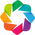

Gutschein Filtered DataFrame:
                  Gutschein  Count  Total Wert
0                 Sanifair    291      173.00
1             Pfand + 0,08     97        8.23
2             Pfand + 0,25    184       50.25
3            Mehrwegbecher    122       12.65
4       Guthabenkarte Text      2       70.00
5        Pfand zurück 0,08      1        0.24
6     Guthabenkarte Kaffee      4       90.00
7  Verzehrgutschein 2 € DB     16       36.00
8        Pfand zurück 0,25      1        0.25
Aggregated Data:
        Datum      Gutschein  Total Wert  Total Count
0 2023-01-01   Pfand + 0,08        0.08            1
1 2023-01-01   Pfand + 0,25        3.50           12
2 2023-01-02  Mehrwegbecher        0.40            3
3 2023-01-02   Pfand + 0,08        0.32            4
4 2023-01-02   Pfand + 0,25        3.00           12
Datum Categories: ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', 

:Chord   [source,target]   (value,count)

In [21]:
import polars as pl
import pandas as pd
import holoviews as hv
from holoviews import dim, opts

hv.extension('bokeh')

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select([
    'Datum',
    'Artikelname',
    'Menge',
    'Zwischensumme'
]).rename({'Artikelname': 'Gutschein', 'Zwischensumme': 'Total Wert'})

# Count occurrences of Gutschein and sum the total value per Gutschein
gutschein_counts = Gutschein.groupby('Gutschein').agg([
    pl.count('Gutschein').alias('Count'),
    pl.sum('Total Wert').alias('Total Wert')
])

# Filter out rows where Count or Total Wert is 0
gutschein_filtered = gutschein_counts.filter(
    (pl.col('Count') > 0) & (pl.col('Total Wert') > 0)
)

# Convert to Pandas DataFrame for processing
gutschein_filtered_df = gutschein_filtered.to_pandas()

# Display the result
print("Gutschein Filtered DataFrame:\n", gutschein_filtered_df)

# Convert the main Gutschein DataFrame to Pandas for further processing
Gutschein_df = Gutschein.to_pandas()

# Convert 'Datum' to datetime with the correct format
Gutschein_df['Datum'] = pd.to_datetime(Gutschein_df['Datum'], format='%d.%m.%Y')

# Filter out negative values
positive_data = Gutschein_df[Gutschein_df['Total Wert'] > 0]

# Aggregate total value and count per Gutschein and Date
aggregated_data = positive_data.groupby(['Datum', 'Gutschein']).agg({'Total Wert': 'sum', 'Menge': 'count'}).reset_index()
aggregated_data.rename(columns={'Menge': 'Total Count'}, inplace=True)

# Debugging print
print("Aggregated Data:\n", aggregated_data.head())

# Prepare data for Chord plot
datum_categories = aggregated_data['Datum'].dt.strftime('%Y-%m-%d').unique().tolist()
gutschein_categories = aggregated_data['Gutschein'].unique().tolist()
all_categories = datum_categories + gutschein_categories

# Debugging print
print("Datum Categories:", datum_categories)
print("Gutschein Categories:", gutschein_categories)
print("All Categories:", all_categories)

source_indices = []
target_indices = []
values = []
counts = []

for _, row in aggregated_data.iterrows():
    source_index = all_categories.index(row['Datum'].strftime('%Y-%m-%d'))
    target_index = all_categories.index(row['Gutschein'])
    source_indices.append(source_index)
    target_indices.append(target_index)
    values.append(row['Total Wert'])
    counts.append(row['Total Count'])

# Debugging print
print("Source Indices:", source_indices)
print("Target Indices:", target_indices)
print("Values:", values)
print("Counts:", counts)

# Ensure no NaN values in the 'values' list
values = [v if pd.notna(v) else 0 for v in values]

# Reconstruct the links DataFrame to ensure indices are within bounds
links = pd.DataFrame({'source': source_indices, 'target': target_indices, 'value': values, 'count': counts})

# Create nodes DataFrame with Total Wert and Total Count
nodes = pd.DataFrame({'index': range(len(all_categories)), 'Category': all_categories})
nodes['Total Wert'] = 0
nodes['Total Count'] = 0

for i, category in enumerate(all_categories):
    if category in datum_categories:
        total_wert = aggregated_data[aggregated_data['Datum'].dt.strftime('%Y-%m-%d') == category]['Total Wert'].sum()
        total_count = aggregated_data[aggregated_data['Datum'].dt.strftime('%Y-%m-%d') == category]['Total Count'].sum()
    else:
        total_wert = aggregated_data[aggregated_data['Gutschein'] == category]['Total Wert'].sum()
        total_count = aggregated_data[aggregated_data['Gutschein'] == category]['Total Count'].sum()
    nodes.at[i, 'Total Wert'] = total_wert
    nodes.at[i, 'Total Count'] = total_count

# Debugging print
print("Nodes:\n", nodes.head())
print("Links:\n", links.head())

nodes_dataset = hv.Dataset(nodes, 'index', ['Category', 'Total Wert', 'Total Count'])

chord = hv.Chord((links, nodes_dataset)).opts(
    opts.Chord(cmap='Category20', edge_color=dim('source').str(), labels='Category', node_color=dim('index').str(), height=800, width=800, title='Total Wert and Count by Gutschein and Date')
)

hv.output(size=200)
chord


In [26]:
#pip install holoviews bokeh pandas




## Top 10 Highest and Lowest Gutschein Total value with Date

In [22]:
import polars as pl
import pandas as pd
import plotly.graph_objects as go

# Assuming df2 is already defined as a Polars DataFrame
Gutschein = df2.select([
    'Datum',
    'Artikelname',
    'Menge',
    'Zwischensumme'
]).rename({'Artikelname': 'Gutschein', 'Zwischensumme': 'Total Wert'})

# Convert to Pandas DataFrame for processing
Gutschein_df = Gutschein.to_pandas()

# Convert 'Datum' to datetime with the correct format
Gutschein_df['Datum'] = pd.to_datetime(Gutschein_df['Datum'], format='%d.%m.%Y')

# Aggregate total value per Gutschein and Date
aggregated_data = Gutschein_df.groupby(['Datum', 'Gutschein']).agg({'Total Wert': 'sum'}).reset_index()

# Filter out rows where Total Wert is zero
aggregated_data = aggregated_data[aggregated_data['Total Wert'] != 0]

# Find the top 10 highest and lowest days based on total value
top_10_highest_days = aggregated_data.nlargest(10, 'Total Wert')
top_10_lowest_days = aggregated_data.nsmallest(10, 'Total Wert')

# Combine the top 10 highest and lowest into one DataFrame
combined_top_days = pd.concat([top_10_highest_days, top_10_lowest_days])

# Plotting using Plotly bar plot
fig = go.Figure()

# Add bars for each Gutschein on the highest days
for date in top_10_highest_days['Datum'].unique():
    day_data = top_10_highest_days[top_10_highest_days['Datum'] == date]
    fig.add_trace(go.Bar(
        x=day_data['Gutschein'],
        y=day_data['Total Wert'],
        name=f"Highest Day: {date.date()}",
        hovertext=day_data['Datum'].astype(str)
    ))

# Add bars for each Gutschein on the lowest days
for date in top_10_lowest_days['Datum'].unique():
    day_data = top_10_lowest_days[top_10_lowest_days['Datum'] == date]
    fig.add_trace(go.Bar(
        x=day_data['Gutschein'],
        y=day_data['Total Wert'],
        name=f"Lowest Day: {date.date()}",
        hovertext=day_data['Datum'].astype(str)
    ))

# Update the layout for better readability
fig.update_layout(
    barmode='group',
    title='Top 10 Highest and Lowest Gutschein Total Wert by Day',
    xaxis_title='Gutschein',
    yaxis_title='Total Wert',
    legend_title='Days',
    template='plotly_white'
)

fig.show()


## 3. Working Hour, Worker and Total Hours of the year. ( From Arbeit-Stunden- 2023)
- Total Time of Working hour by Worker Name (in hours)
- To and Bottom Daily Summary: Total Work Hours, Total Workers, Avg Work Hours per Worker

In [23]:

df3 = pl.read_excel("Arbeit-student-2023.xlsx")
df3


Personalnr.,Mitarbeitername,Anmeldung,Anmeldungstyp,Abmeldung,Abmeldungstyp,Arbeitszeit
i64,str,str,str,str,str,str
1308,"""Heike Schwedt""","""01/01/23 06:52""","""Anmeldung""","""01/01/23 12:00""","""Abmeldung""","""05:08"""
1302,"""Thomas Braun""","""01/01/23 10:08""","""Anmeldung""","""01/01/23 05:08""","""Abmeldung""","""06:59"""
1308,"""Heike Schwedt""","""01/02/23 04:53""","""Anmeldung""","""01/02/23 10:42""","""Pausenstart""","""05:48"""
1303,"""Luisa Lentisco""","""01/02/23 05:56""","""Anmeldung""","""01/02/23 11:13""","""Pausenstart""","""05:17"""
1308,"""Heike Schwedt""","""01/02/23 11:08""","""Pausenende""","""01/02/23 01:23""","""Abmeldung""","""02:15"""
…,…,…,…,…,…,…
1315,"""Azra Luma""","""12/30/23 03:07""","""Anmeldung""","""12/30/23 07:15""","""Abmeldung""","""04:07"""
1307,"""Jessica Büttner""","""12/31/23 05:57""","""Anmeldung""","""12/31/23 01:01""","""Abmeldung""","""07:04"""
1326,"""Nirmala Tamang""","""12/31/23 06:11""","""Anmeldung""","""12/31/23 09:59""","""Abmeldung""","""03:47"""


In [24]:
df3.columns

['Personalnr.',
 'Mitarbeitername',
 'Anmeldung',
 'Anmeldungstyp',
 'Abmeldung',
 'Abmeldungstyp',
 'Arbeitszeit']

In [25]:
personal = df3.select(['Personalnr.',
 'Mitarbeitername',
 'Anmeldung',
 'Anmeldungstyp',
 'Abmeldung',
 'Abmeldungstyp',
 'Arbeitszeit'])
personal

Personalnr.,Mitarbeitername,Anmeldung,Anmeldungstyp,Abmeldung,Abmeldungstyp,Arbeitszeit
i64,str,str,str,str,str,str
1308,"""Heike Schwedt""","""01/01/23 06:52""","""Anmeldung""","""01/01/23 12:00""","""Abmeldung""","""05:08"""
1302,"""Thomas Braun""","""01/01/23 10:08""","""Anmeldung""","""01/01/23 05:08""","""Abmeldung""","""06:59"""
1308,"""Heike Schwedt""","""01/02/23 04:53""","""Anmeldung""","""01/02/23 10:42""","""Pausenstart""","""05:48"""
1303,"""Luisa Lentisco""","""01/02/23 05:56""","""Anmeldung""","""01/02/23 11:13""","""Pausenstart""","""05:17"""
1308,"""Heike Schwedt""","""01/02/23 11:08""","""Pausenende""","""01/02/23 01:23""","""Abmeldung""","""02:15"""
…,…,…,…,…,…,…
1315,"""Azra Luma""","""12/30/23 03:07""","""Anmeldung""","""12/30/23 07:15""","""Abmeldung""","""04:07"""
1307,"""Jessica Büttner""","""12/31/23 05:57""","""Anmeldung""","""12/31/23 01:01""","""Abmeldung""","""07:04"""
1326,"""Nirmala Tamang""","""12/31/23 06:11""","""Anmeldung""","""12/31/23 09:59""","""Abmeldung""","""03:47"""


## Total Time of Working hour by Worker Name (in hours)


In [215]:
import polars as pl
import pandas as pd
import plotly.express as px


personal = df3.select([
    'Mitarbeitername',
    'Arbeitszeit'
])

# Convert to Pandas DataFrame for further processing
personal_df = personal.to_pandas()

# Debugging print
print("Initial DataFrame:\n", personal_df)

# Convert 'Arbeitszeit' to total seconds
def convert_to_seconds(time_str):
    try:
        h, m = map(int, time_str.split(':'))
        return h * 3600 + m * 60
    except Exception:
        return 0

personal_df['Arbeitszeit'] = personal_df['Arbeitszeit'].apply(convert_to_seconds)

# Debugging print
print("DataFrame after converting Arbeitszeit to seconds:\n", personal_df)

# Aggregate total Arbeitszeit per Mitarbeitername
aggregated_data = personal_df.groupby('Mitarbeitername').agg({'Arbeitszeit': 'sum'}).reset_index()

# Convert total seconds to hours for display
def seconds_to_hours(seconds):
    return seconds / 3600

aggregated_data['Arbeitszeit'] = aggregated_data['Arbeitszeit'].apply(seconds_to_hours)

# Sort the data in descending order
aggregated_data = aggregated_data.sort_values(by='Arbeitszeit', ascending=False)

# Debugging print
print("Aggregated Data with Arbeitszeit in hours (sorted):\n", aggregated_data)

# Plot the aggregated data to check correctness
fig = px.bar(
    aggregated_data, 
    x='Mitarbeitername', 
    y='Arbeitszeit', 
    title='Total Working Hour by Worker Name (in hours)',
    color='Arbeitszeit',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(xaxis_title='Worker Name', yaxis_title='Worked Time (hours)', barmode='group')
fig.show()


Initial DataFrame:
       Mitarbeitername Arbeitszeit
0       Heike Schwedt       05:08
1        Thomas Braun       06:59
2       Heike Schwedt       05:48
3      Luisa Lentisco       05:17
4       Heike Schwedt       02:15
...               ...         ...
1483        Azra Luma       04:07
1484  Jessica Büttner       07:04
1485   Nirmala Tamang       03:47
1486   Rupa Lamichane       07:02
1487        Azra Luma       08:48

[1488 rows x 2 columns]
DataFrame after converting Arbeitszeit to seconds:
       Mitarbeitername  Arbeitszeit
0       Heike Schwedt        18480
1        Thomas Braun        25140
2       Heike Schwedt        20880
3      Luisa Lentisco        19020
4       Heike Schwedt         8100
...               ...          ...
1483        Azra Luma        14820
1484  Jessica Büttner        25440
1485   Nirmala Tamang        13620
1486   Rupa Lamichane        25320
1487        Azra Luma        31680

[1488 rows x 2 columns]
Aggregated Data with Arbeitszeit in hours (sorted)

##  To and Bottom Daily Summary: Total Work Hours, Total Workers, Avg Work Hours per Worker

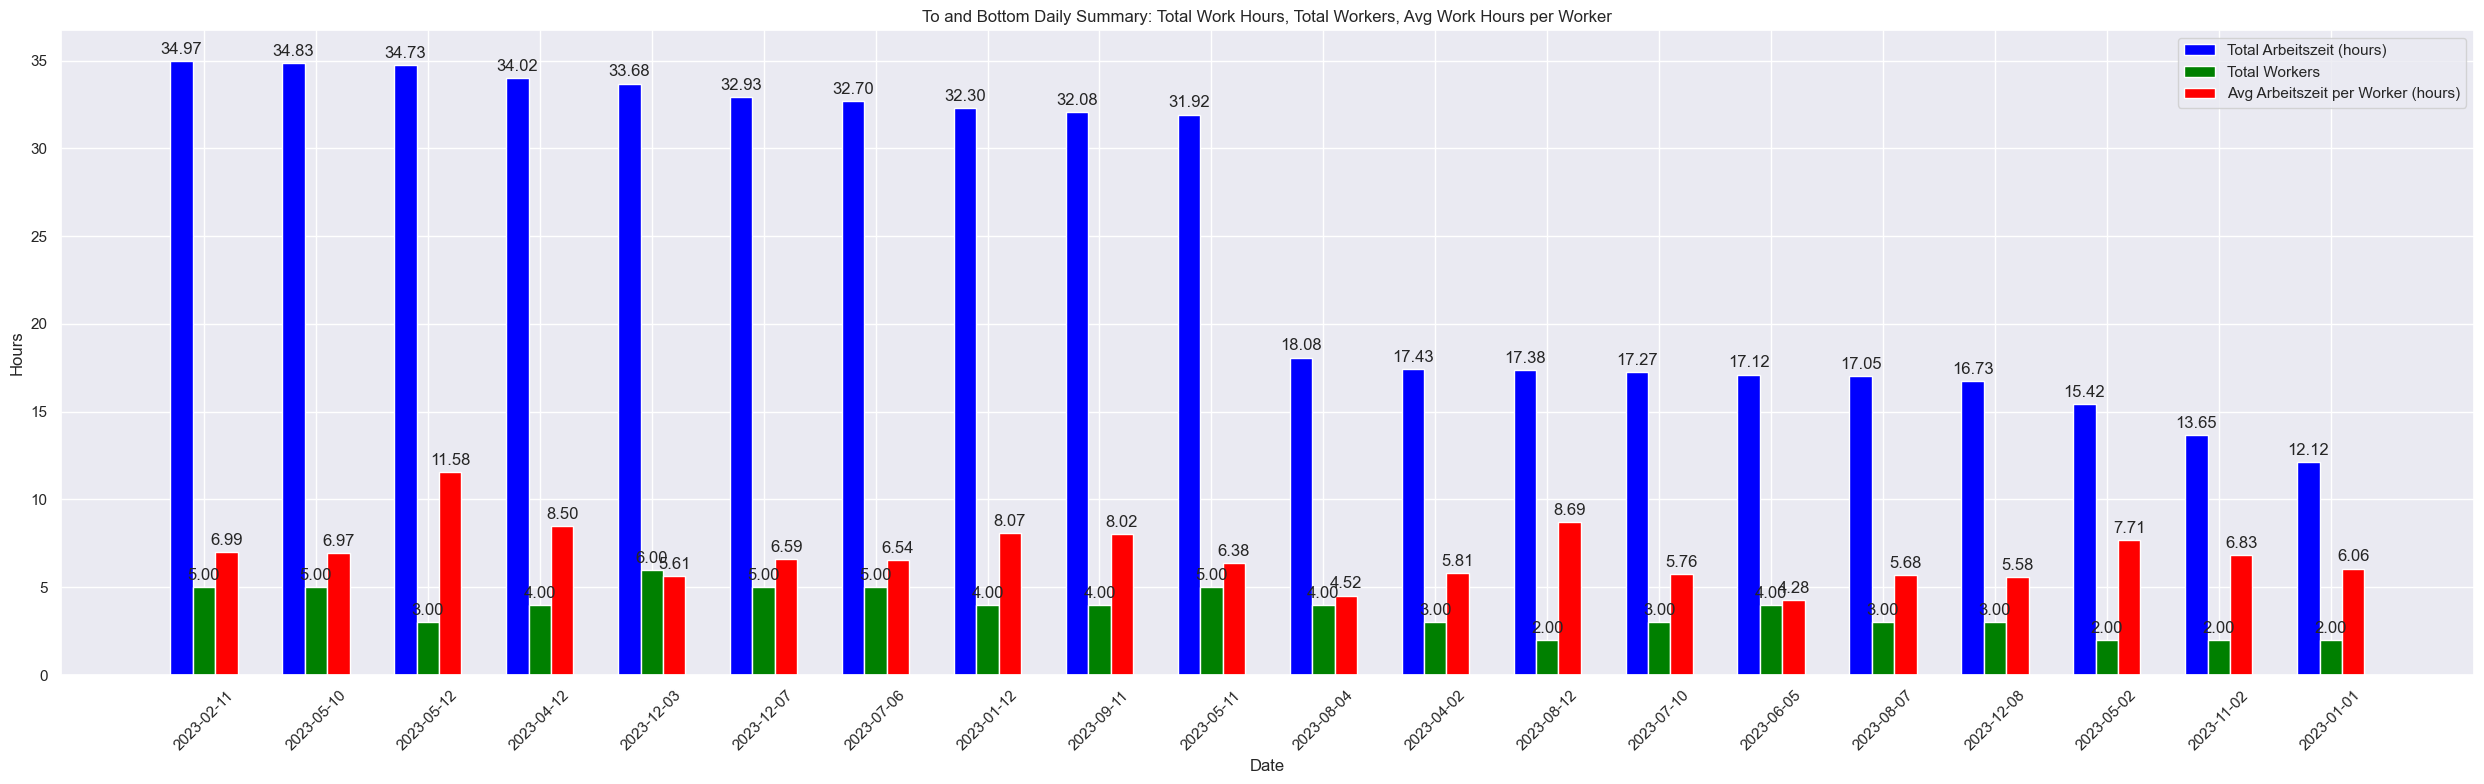

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df3 is already defined as a Polars DataFrame
personal = df3.select([
    'Mitarbeitername',
    'Anmeldung',
    'Arbeitszeit'
])

# Convert to Pandas DataFrame for further processing
personal_df = personal.to_pandas()

# Convert 'Anmeldung' to datetime
personal_df['Anmeldung'] = pd.to_datetime(personal_df['Anmeldung'], format='%d/%m/%y %H:%M', errors='coerce')

# Extract the date part from 'Anmeldung'
personal_df['Datum'] = personal_df['Anmeldung'].dt.date

# Convert 'Arbeitszeit' to total seconds
def convert_to_seconds(time_str):
    try:
        h, m = map(int, time_str.split(':'))
        return h * 3600 + m * 60
    except Exception:
        return 0

personal_df['Arbeitszeit'] = personal_df['Arbeitszeit'].apply(convert_to_seconds)

# Aggregate total Arbeitszeit per Mitarbeitername and date
aggregated_data = personal_df.groupby(['Datum', 'Mitarbeitername']).agg({'Arbeitszeit': 'sum'}).reset_index()

# Calculate total work hours and total workers per day
daily_summary = aggregated_data.groupby('Datum').agg(
    Total_Arbeitszeit=('Arbeitszeit', 'sum'),
    Total_Workers=('Mitarbeitername', 'nunique')
).reset_index()

# Calculate average work hours per worker
daily_summary['Avg_Arbeitszeit_per_Worker'] = daily_summary['Total_Arbeitszeit'] / daily_summary['Total_Workers']

# Convert total seconds to hours for display
daily_summary['Total_Arbeitszeit'] = daily_summary['Total_Arbeitszeit'] / 3600
daily_summary['Avg_Arbeitszeit_per_Worker'] = daily_summary['Avg_Arbeitszeit_per_Worker'] / 3600

# Sort the data in descending order by total work hours
daily_summary = daily_summary.sort_values(by='Total_Arbeitszeit', ascending=False)

# Select top 10 and bottom 10 days
top_10_days = daily_summary.head(10)
bottom_10_days = daily_summary.tail(10)

# Combine top 10 and bottom 10 with a label
top_10_days['Category'] = 'Top 10'
bottom_10_days['Category'] = 'Bottom 10'
combined_days = pd.concat([top_10_days, bottom_10_days])

# Create a bar plot with grouped bars
fig, ax = plt.subplots(figsize=(25, 8))

bar_width = 0.2
index = np.arange(len(combined_days))

# Bar plots
bar1 = ax.bar(index, combined_days['Total_Arbeitszeit'], bar_width, label='Total Arbeitszeit (hours)', color='blue')
bar2 = ax.bar(index + bar_width, combined_days['Total_Workers'], bar_width, label='Total Workers', color='green')
bar3 = ax.bar(index + 2 * bar_width, combined_days['Avg_Arbeitszeit_per_Worker'], bar_width, label='Avg Arbeitszeit per Worker (hours)', color='red')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('To and Bottom Daily Summary: Total Work Hours, Total Workers, Avg Work Hours per Worker')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(combined_days['Datum'], rotation=45)

# Add legend
ax.legend()

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()



# Last Part Machine Learning Parts
## I am having a problem to Join them all Together. So fro this Part I am taking Only two Exel , 
## Feture Are - TotalSale and Datum



In [145]:
statist= pl.read_excel("new-statistic.xlsx")
statist

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername
str,str,str,f64,str,f64,f64,f64,f64,f64,f64,bool,str
"""01.01.2023""","""08:45:07""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,2.5,2.5,0.19,3.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:46:25""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,4.6,4.6,0.19,10.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:50:40""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,7.8,7.8,0.07,0.0,7.8,false,"""Heike Schwedt"""
"""01.01.2023""","""09:04:36""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,2.5,2.5,0.19,20.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""09:10:57""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,3.6,7.9,0.19,0.0,7.9,false,"""Heike Schwedt"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:53""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,4.9,4.9,0.07,0.0,4.9,false,"""Azra Luma"""
"""31.12.2023""","""18:51:55""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""
"""31.12.2023""","""18:53:55""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""


## Objectives:

### 1.Joining Statistic and Daybook , as Sales Data


In [146]:
statist

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername
str,str,str,f64,str,f64,f64,f64,f64,f64,f64,bool,str
"""01.01.2023""","""08:45:07""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,2.5,2.5,0.19,3.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:46:25""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,4.6,4.6,0.19,10.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""08:50:40""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,7.8,7.8,0.07,0.0,7.8,false,"""Heike Schwedt"""
"""01.01.2023""","""09:04:36""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,2.5,2.5,0.19,20.0,0.0,false,"""Heike Schwedt"""
"""01.01.2023""","""09:10:57""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,3.6,7.9,0.19,0.0,7.9,false,"""Heike Schwedt"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:53""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,4.9,4.9,0.07,0.0,4.9,false,"""Azra Luma"""
"""31.12.2023""","""18:51:55""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""
"""31.12.2023""","""18:53:55""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma"""


In [147]:
sales = statist.join(Daybook, on='Datum', how='inner')


In [148]:
sales

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername,Umsatz,Anzahl Kunden,Storno Wert,Kassen Differenz
str,str,str,f64,str,f64,f64,f64,f64,f64,f64,bool,str,f64,i64,f64,f64
"""01.01.2023""","""08:45:07""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,2.5,2.5,0.19,3.0,0.0,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""08:46:25""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,4.6,4.6,0.19,10.0,0.0,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""08:50:40""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,7.8,7.8,0.07,0.0,7.8,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""09:04:36""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,2.5,2.5,0.19,20.0,0.0,false,"""Heike Schwedt""",809.4,122,null,0.6
"""01.01.2023""","""09:10:57""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,3.6,7.9,0.19,0.0,7.9,false,"""Heike Schwedt""",809.4,122,null,0.6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:53""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,4.9,4.9,0.07,0.0,4.9,false,"""Azra Luma""",1412.96,205,null,-1.24
"""31.12.2023""","""18:51:55""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma""",1412.96,205,null,-1.24
"""31.12.2023""","""18:53:55""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,4.2,4.2,0.07,0.0,4.2,false,"""Azra Luma""",1412.96,205,null,-1.24


In [149]:
print(sales.head(2))
print(sales.tail(2))
print(sales.sample(2))

shape: (2, 17)
┌────────────┬──────────┬───────────┬───────┬───┬────────┬────────┬─────────────┬───────────┐
│ Datum      ┆ Uhrzeit  ┆ Aufnahme  ┆ Menge ┆ … ┆ Umsatz ┆ Anzahl ┆ Storno Wert ┆ Kassen    │
│ ---        ┆ ---      ┆ Zeitpunkt ┆ ---   ┆   ┆ ---    ┆ Kunden ┆ ---         ┆ Differenz │
│ str        ┆ str      ┆ ---       ┆ f64   ┆   ┆ f64    ┆ ---    ┆ f64         ┆ ---       │
│            ┆          ┆ str       ┆       ┆   ┆        ┆ i64    ┆             ┆ f64       │
╞════════════╪══════════╪═══════════╪═══════╪═══╪════════╪════════╪═════════════╪═══════════╡
│ 01.01.2023 ┆ 08:45:07 ┆ 08:45:03  ┆ 1.0   ┆ … ┆ 809.4  ┆ 122    ┆ null        ┆ 0.6       │
│ 01.01.2023 ┆ 08:46:25 ┆ 08:46:02  ┆ 1.0   ┆ … ┆ 809.4  ┆ 122    ┆ null        ┆ 0.6       │
└────────────┴──────────┴───────────┴───────┴───┴────────┴────────┴─────────────┴───────────┘
shape: (2, 17)
┌────────────┬──────────┬──────────────┬───────┬───┬─────────┬────────┬──────────────┬─────────────┐
│ Datum      ┆ Uhrzeit 

In [150]:
import polars.selectors as cs

# Polars feature selectiom
numeric_data_sales = sales.select(cs.numeric())
categorical_data_sales = sales.select(cs.string())


In [151]:
sales.select(pl.all().is_null().sum())

Datum,Uhrzeit,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Summe ArtikelOrig,Bonsumme,MwSt,Bar,EC-Karte,In-Haus,Mitarbeitername,Umsatz,Anzahl Kunden,Storno Wert,Kassen Differenz
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136919,0


In [152]:
sales = sales.with_columns(
    pl.col("Storno Wert").fill_null(pl.lit(0)),
)
print(sales)

shape: (141_566, 17)
┌────────────┬──────────┬──────────────┬───────┬───┬─────────┬────────┬──────────────┬─────────────┐
│ Datum      ┆ Uhrzeit  ┆ Aufnahme     ┆ Menge ┆ … ┆ Umsatz  ┆ Anzahl ┆ Storno Wert  ┆ Kassen      │
│ ---        ┆ ---      ┆ Zeitpunkt    ┆ ---   ┆   ┆ ---     ┆ Kunden ┆ ---          ┆ Differenz   │
│ str        ┆ str      ┆ ---          ┆ f64   ┆   ┆ f64     ┆ ---    ┆ f64          ┆ ---         │
│            ┆          ┆ str          ┆       ┆   ┆         ┆ i64    ┆              ┆ f64         │
╞════════════╪══════════╪══════════════╪═══════╪═══╪═════════╪════════╪══════════════╪═════════════╡
│ 01.01.2023 ┆ 08:45:07 ┆ 08:45:03     ┆ 1.0   ┆ … ┆ 809.4   ┆ 122    ┆ 0.0          ┆ 0.6         │
│ 01.01.2023 ┆ 08:46:25 ┆ 08:46:02     ┆ 1.0   ┆ … ┆ 809.4   ┆ 122    ┆ 0.0          ┆ 0.6         │
│ 01.01.2023 ┆ 08:50:40 ┆ 08:50:23     ┆ 2.0   ┆ … ┆ 809.4   ┆ 122    ┆ 0.0          ┆ 0.6         │
│ 01.01.2023 ┆ 09:04:36 ┆ 09:04:32     ┆ 1.0   ┆ … ┆ 809.4   ┆ 122    

In [153]:
sales.columns

['Datum',
 'Uhrzeit',
 'Aufnahme Zeitpunkt',
 'Menge',
 'Artikelname',
 'VK-Preis',
 'Summe ArtikelOrig',
 'Bonsumme',
 'MwSt',
 'Bar',
 'EC-Karte',
 'In-Haus',
 'Mitarbeitername',
 'Umsatz',
 'Anzahl Kunden',
 'Storno Wert',
 'Kassen Differenz']

In [154]:
sales = sales['Datum','Aufnahme Zeitpunkt','Menge','Artikelname','VK-Preis','Bar',
              'EC-Karte','In-Haus','Mitarbeitername','Umsatz','Anzahl Kunden','Storno Wert','Kassen Differenz']
sales

Datum,Aufnahme Zeitpunkt,Menge,Artikelname,VK-Preis,Bar,EC-Karte,In-Haus,Mitarbeitername,Umsatz,Anzahl Kunden,Storno Wert,Kassen Differenz
str,str,f64,str,f64,f64,f64,bool,str,f64,i64,f64,f64
"""01.01.2023""","""08:45:03""",1.0,"""Großer Filterkaffee""",2.5,3.0,0.0,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""08:46:02""",1.0,"""BIG Cappuccino Kokosreis""",4.6,10.0,0.0,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""08:50:23""",2.0,"""Vegan Caesar Wrap""",3.9,0.0,7.8,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""09:04:32""",1.0,"""Doppelter Espresso""",2.5,20.0,0.0,false,"""Heike Schwedt""",809.4,122,0.0,0.6
"""01.01.2023""","""09:10:38""",1.0,"""Cappuccino Hafer""",3.6,0.0,7.9,false,"""Heike Schwedt""",809.4,122,0.0,0.6
…,…,…,…,…,…,…,…,…,…,…,…,…
"""31.12.2023""","""18:35:41""",1.0,"""Holy Granola Kater""",4.9,0.0,4.9,false,"""Azra Luma""",1412.96,205,0.0,-1.24
"""31.12.2023""","""18:51:32""",1.0,"""Grilled Veggie Stulle""",4.2,0.0,4.2,false,"""Azra Luma""",1412.96,205,0.0,-1.24
"""31.12.2023""","""18:53:43""",1.0,"""Vegan Caesar Wrap""",4.2,0.0,4.2,false,"""Azra Luma""",1412.96,205,0.0,-1.24



## 2. Uloading Releted Library.


In [155]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsforecast import StatsForecast
from pmdarima import auto_arima
from statsforecast.models import AutoARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [156]:
sales.columns

['Datum',
 'Aufnahme Zeitpunkt',
 'Menge',
 'Artikelname',
 'VK-Preis',
 'Bar',
 'EC-Karte',
 'In-Haus',
 'Mitarbeitername',
 'Umsatz',
 'Anzahl Kunden',
 'Storno Wert',
 'Kassen Differenz']

"""
# Utility Functions: Inverse Stationarity and MAPE Calculation

This section includes two utility functions: `inverse_stationarity` and `MAPE`.

1. **Function: `inverse_stationarity`**
   This function is designed to reverse the process of making a time series stationary. It can be used to revert a series to its original scale after it has been transformed to achieve stationarity (e.g., through log differencing).

   Steps:
   - **Copy the input data**: Ensures the original data is not modified.
   - **Insert the first value**: Adds the first value back into the data.
   - **Compute cumulative sum**: Calculates the cumulative sum of the array.
   - **Remove the first value**: Deletes the first value after the cumulative sum calculation.
   - **Apply the exponential function**: Reverts any log transformation by applying the exponential function to the cumulative sum.

2. **Function: `MAPE` (Mean Absolute Percentage Error)**
   This function calculates the Mean Absolute Percentage Error, a metric used to evaluate the accuracy of forecast models. MAPE expresses the accuracy as a percentage, making it easy to interpret.

   Steps:
   - **Calculate percentage error**: Computes the percentage error for each data point by comparing actual and predicted values.
   - **Absolute value**: Takes the absolute value of each percentage error.
   - **Mean of errors**: Calculates the mean of these absolute percentage errors to get the MAPE value.

These functions are essential for time series analysis and forecasting, providing tools for model evaluation and data transformation.
"""


In [157]:
def inverse_stationarity(data, first_value):
    p_i=data.copy()
    p_i=np.insert(p_i,0,first_value) # insert fist value
    p_i=np.cumsum(p_i)
    p_i=np.delete(p_i,0) # remove the first value after calculating cummulative
    p_i=np.exp(p_i) # if you use log 10 then use np.power(10, p_i)
    return p_i


def MAPE(y_actual, y_pred): 
    return np.mean(np.abs((y_actual - y_pred) / y_actual))



## 4. Specifying only releted column.(Date, Menge(number odf product), Vk-preise(selling prise of each goods))



In [158]:
# New data sales with specified columns
sales = sales['Datum','Aufnahme Zeitpunkt','Menge','Artikelname','VK-Preis','Bar',
              'EC-Karte','In-Haus','Mitarbeitername','Umsatz','Anzahl Kunden','Storno Wert','Kassen Differenz']
sales_keep_cols = sales['Datum', 'Menge', 'VK-Preis']


sales_keep_cols

Datum,Menge,VK-Preis
str,f64,f64
"""01.01.2023""",1.0,2.5
"""01.01.2023""",1.0,4.6
"""01.01.2023""",2.0,3.9
"""01.01.2023""",1.0,2.5
"""01.01.2023""",1.0,3.6
…,…,…
"""31.12.2023""",1.0,4.9
"""31.12.2023""",1.0,4.2
"""31.12.2023""",1.0,4.2


In [159]:
# Perform the calculation directly in Polars
sales_keep_cols = sales_keep_cols.with_columns(
    (pl.col("Menge") * pl.col("VK-Preis")).alias("TotalPrice")
)

# If you need to convert to pandas
sales_keep_cols_pd = sales_keep_cols.to_pandas()

# Display the result
print(sales_keep_cols_pd)

             Datum  Menge  VK-Preis  TotalPrice
0       01.01.2023    1.0       2.5         2.5
1       01.01.2023    1.0       4.6         4.6
2       01.01.2023    2.0       3.9         7.8
3       01.01.2023    1.0       2.5         2.5
4       01.01.2023    1.0       3.6         3.6
...            ...    ...       ...         ...
141561  31.12.2023    1.0       4.9         4.9
141562  31.12.2023    1.0       4.2         4.2
141563  31.12.2023    1.0       4.2         4.2
141564  31.12.2023    1.0       1.9         1.9
141565  31.12.2023    1.0       4.2         4.2

[141566 rows x 4 columns]


In [160]:
#pip install prophet


## 5. From These specifying only - Datum, TotalPrice  ,Total Menge-(Each Day total sales prise for the total number of Goods)

## 6. Convert Polars DataFrame to pandas for further processing

In [161]:
# Select the relevant columns for analysis
sales_keep_cols = sales.select(['Datum', 'Menge', 'VK-Preis'])

# Calculate TotalPrice
sales_keep_cols = sales_keep_cols.with_columns(
    (pl.col('Menge') * pl.col('VK-Preis')).alias('TotalPrice')
)

# Convert 'Datum' column to datetime and group by date, summing TotalPrice and Menge
daily_cost = sales_keep_cols.with_columns(
    pl.col('Datum').str.strptime(pl.Date, format='%d.%m.%Y').alias('Datum')
).groupby('Datum').agg([
    pl.sum('TotalPrice').alias('TotalPrice'),
    pl.sum('Menge').alias('Total Menge')
]).sort('Datum')

# Convert Polars DataFrame to pandas for further processing
daily_cost_pd = daily_cost.to_pandas()

# Print the prepared DataFrame
print("Prepared DataFrame:")
print(daily_cost_pd)

Prepared DataFrame:
         Datum  TotalPrice  Total Menge
0   2023-01-01      809.40        245.0
1   2023-01-02     1005.70        288.0
2   2023-01-03      924.90        270.0
3   2023-01-04     1171.72        305.0
4   2023-01-05     1020.56        281.0
..         ...         ...          ...
360 2023-12-27     1125.70        289.0
361 2023-12-28     1117.52        311.0
362 2023-12-29     1402.28        371.0
363 2023-12-30     1175.96        310.0
364 2023-12-31     1412.96        387.0

[365 rows x 3 columns]


"""
# Data Preparation for Time Series Analysis

This section prepares the sales data for time series analysis by performing the following steps:

1. **Select Relevant Columns**:
   The columns 'Datum', 'Menge', and 'VK-Preis' are selected from the `sales` DataFrame to keep only the relevant data for analysis.

2. **Calculate TotalPrice**:
   A new column 'TotalPrice' is calculated by multiplying 'Menge' (quantity) with 'VK-Preis' (price per unit).

3. **Convert 'Datum' to Datetime and Group by Date**:
   - The 'Datum' column is converted to a datetime format.
   - The data is grouped by 'Datum', summing 'TotalPrice' and 'Menge' for each date.
   - The DataFrame is then sorted by 'Datum'.

4. **Convert Polars DataFrame to pandas**:
   The resulting Polars DataFrame is converted to a pandas DataFrame for compatibility with subsequent processing steps.

5. **Log Transformation and Differencing**:
   - The 'TotalPrice' column is log-transformed to stabilize the variance.
   - The first difference of the logged 'TotalPrice' is calculated to make the series stationary.
   - The first value of the logged 'TotalPrice' is stored for future reference.
   - Lagged versions (1-period and 2-period) of the differenced logged 'TotalPrice' are created.

6. **Drop NaN Values**:
   Any rows containing NaN values resulting from the differencing and lagging operations are removed to ensure a clean dataset.

7. **Print the Prepared DataFrame**:
   The prepared DataFrame is printed to verify the transformations and ensure the data is ready for analysis.
"""


"""
# Log Transformation and Differencing

This section performs log transformation and differencing on the 'TotalPrice' column to stabilize variance and achieve stationarity in the time series data. Additionally, lagged versions of the differenced data are created for further analysis.

1. **Log Transformation**:
   The 'TotalPrice' column is log-transformed to stabilize the variance, resulting in the 'log_tp' column. Log transformation helps in dealing with exponential growth patterns in the data.

2. **First Differencing**:
   The first difference of the log-transformed 'TotalPrice' is calculated and stored in the 'log_tp_diff' column. Differencing helps in removing trends and making the time series stationary.

3. **Store First Value of Log-Transformed Data**:
   The first value of the log-transformed 'TotalPrice' is stored in a variable named `first_ref_log_tp` for potential future use.

4. **Create Lagged Versions**:
   - `log_tp_diff_lag_2`: A 2-period lag of the differenced log-transformed 'TotalPrice' is created.
   - `log_tp_diff_lag_1`: A 1-period lag of the differenced log-transformed 'TotalPrice' is created.
   Lagged versions are useful for time series analysis, especially in autoregressive models where past values are used to predict future values.

These transformations are essential for preparing the data for time series analysis and modeling.
"""




## 7.  Log transformation and differencing



In [162]:
# Select the relevant columns for analysis
sales_keep_cols = sales.select(['Datum', 'Menge', 'VK-Preis'])

# Calculate TotalPrice
sales_keep_cols = sales_keep_cols.with_columns(
    (pl.col('Menge') * pl.col('VK-Preis')).alias('TotalPrice')
)

# Convert 'Datum' column to datetime and group by date, summing TotalPrice and Menge
daily_cost = sales_keep_cols.with_columns(
    pl.col('Datum').str.strptime(pl.Date, format='%d.%m.%Y').alias('Datum')
).groupby('Datum').agg([
    pl.sum('TotalPrice').alias('TotalPrice'),
    pl.sum('Menge').alias('Total Menge')
]).sort('Datum')

# Convert Polars DataFrame to pandas for further processing
daily_cost_pd = daily_cost.to_pandas()

# Log transformation and differencing
daily_cost_pd['log_tp'] = np.log(daily_cost_pd['TotalPrice'])
daily_cost_pd['log_tp_diff'] = daily_cost_pd['log_tp'].diff()
first_ref_log_tp = daily_cost_pd['log_tp'].iloc[0]
daily_cost_pd['log_tp_diff_lag_2'] = daily_cost_pd['log_tp_diff'].shift(2)
daily_cost_pd['log_tp_diff_lag_1'] = daily_cost_pd['log_tp_diff'].shift(1)

# Drop NaN values
daily_cost_pd = daily_cost_pd.dropna()

# Print the prepared DataFrame
print("Prepared DataFrame:")
daily_cost_pd

Prepared DataFrame:


,Datum,TotalPrice,Total Menge,log_tp,log_tp_diff,log_tp_diff_lag_2,log_tp_diff_lag_1
3,2023-01-04,1171.72,305.0,7.066228,0.236542,0.217146,-0.083753
4,2023-01-05,1020.56,281.0,6.928107,-0.138121,-0.083753,0.236542
5,2023-01-06,1100.91,300.0,7.003892,0.075786,0.236542,-0.138121
6,2023-01-07,1055.70,285.0,6.961959,-0.041933,-0.138121,0.075786
7,2023-01-08,1165.03,327.0,7.060502,0.098543,0.075786,-0.041933
...,...,...,...,...,...,...,...
360,2023-12-27,1125.70,289.0,7.026160,0.341799,-0.391825,0.190063
361,2023-12-28,1117.52,311.0,7.018867,-0.007293,0.190063,0.341799
362,2023-12-29,1402.28,371.0,7.245855,0.226988,0.341799,-0.007293
363,2023-12-30,1175.96,310.0,7.069840,-0.176015,-0.007293,0.226988


"""
# Time Series Line Plot of TotalPrice

This section plots a time series line plot of the 'TotalPrice' column from the `daily_cost_pd` DataFrame against the 'Datum' column. The `seaborn` library is used to create a clear and informative visualization.

Steps:
1. **Set Figure Size and Resolution**:
   - The figure size is set to 10 inches wide and 5 inches tall (`figsize=(10, 5)`).
   - The resolution is set to 80 dots per inch (`dpi=80`), controlling the clarity of the image.

2. **Create Line Plot**:
   - The x-axis represents the 'Datum' column, which contains the dates.
   - The y-axis represents the 'TotalPrice' column, which contains the total costs.
   - The data is taken from the `daily_cost_pd` DataFrame.
   - A label 'Total cost' is added to the plot for legend purposes.

This plot provides a visual representation of the total costs over time, allowing for easy identification of trends and patterns in the time series data.
"""


## 8.  Line Plot Total Cost



<Axes: xlabel='Datum', ylabel='TotalPrice'>

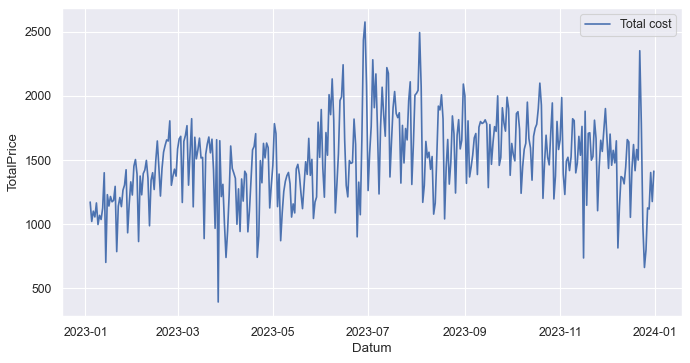

In [163]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Datum', y='TotalPrice', data=daily_cost_pd, label='Total cost')

"""
# Train/Test Split

This section splits the dataset into training and testing sets and defines the features and target variable for the training set.

1. **Train/Test Split**:
   - The dataset is divided into training and testing sets to evaluate the model's performance on unseen data.

2. **Define Features and Target for Training**:
   - `X_train` contains the features used for training the model.
   - `y_train` contains the target variable that the model aims to predict.
"""

"""
# Plotting Train/Test Data

This section involves plotting the training and testing data to visualize the split and compare real values with predicted values.

1. **Create Plot**:
   A figure and axis object are created for the plot, with a specified size to ensure clarity and readability.

2. **Plot Training Data**:
   The training data is plotted on the axis to show the real values. This provides a visual representation of the actual data used to train the model.

3. **Plot Testing Data**:
   The testing data is plotted on the same axis to show the predicted values. This allows for a direct comparison between the actual and predicted values, helping to evaluate the model's performance.

4. **Add Legend**:
   A legend is added to the plot to distinguish between the real values (training data) and the predicted values (testing data). This enhances the plot's readability and makes it easier to interpret.

5. **Display Plot**:
   The plot is displayed to visualize the data, providing a clear picture of the train/test split and the model's performance.

This visualization is crucial for understanding how well the model has captured the patterns in the training data and how accurately it is predicting the test data.
"""


## 9.  Train/test split
        - X_train = train(['Datum','TotalPrice'])
        - y_train = train['TotalPrice']

## 10. Subplot Train/test split



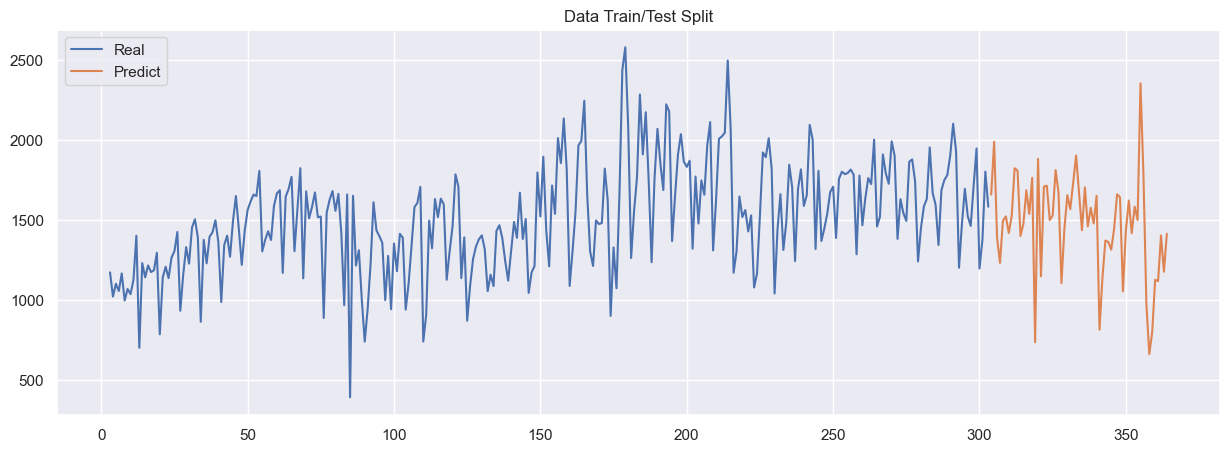

In [164]:
# Train/test split
train = daily_cost_pd[daily_cost_pd.Datum < '2023-11-01'] # 11 months
test = daily_cost_pd[daily_cost_pd.Datum >= '2023-11-01'] # 1 month

# Drop missing values in the training set
train = train.dropna()
X_train = train.drop(['Datum','TotalPrice'], axis=1)  
y_train = train['TotalPrice']

X_test= test.drop(['Datum','TotalPrice'], axis=1)  
y_test = test['TotalPrice']


# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, y='TotalPrice', label='Real', title='Data Train/Test Split')
test.plot(ax=ax, y='TotalPrice', label='Predict')
ax.legend(['Real', 'Predict'])
plt.show()


In [215]:
X_train

,Total Menge,log_tp,log_tp_diff,log_tp_diff_lag_2,log_tp_diff_lag_1
3,305.0,7.066228,0.236542,0.217146,-0.083753
4,281.0,6.928107,-0.138121,-0.083753,0.236542
5,300.0,7.003892,0.075786,0.236542,-0.138121
6,285.0,6.961959,-0.041933,-0.138121,0.075786
7,327.0,7.060502,0.098543,0.075786,-0.041933
...,...,...,...,...,...
299,516.0,7.573187,0.126713,-0.040204,0.159016
300,313.0,7.086947,-0.486240,0.159016,0.126713
301,369.0,7.225707,0.138760,0.126713,-0.486240
302,435.0,7.496036,0.270329,-0.486240,0.138760


In [165]:
daily_cost_pd.columns

Index(['Datum', 'TotalPrice', 'Total Menge', 'log_tp', 'log_tp_diff',
       'log_tp_diff_lag_2', 'log_tp_diff_lag_1'],
      dtype='object')

In [166]:
# Check for NaN values in the relevant columns
print(daily_cost_pd[['log_tp_diff_lag_2', 'log_tp_diff_lag_1', 'log_tp_diff']].isna().sum())

# Display the first few rows to confirm the columns are not empty
print(daily_cost_pd[['log_tp_diff_lag_2', 'log_tp_diff_lag_1', 'log_tp_diff']].head())


log_tp_diff_lag_2    0
log_tp_diff_lag_1    0
log_tp_diff          0
dtype: int64
   log_tp_diff_lag_2  log_tp_diff_lag_1  log_tp_diff
3           0.217146          -0.083753     0.236542
4          -0.083753           0.236542    -0.138121
5           0.236542          -0.138121     0.075786
6          -0.138121           0.075786    -0.041933
7           0.075786          -0.041933     0.098543


## 11.
### Create an instance of XGBRegressor with specified hyperparameters

# XGBoost Regression Model Training

This section involves training an XGBoost regression model using the `XGBRegressor` class from the `xgboost` library. The model is configured with specific hyperparameters to optimize its performance.


1. **Initialize the XGBoost Regressor**:
   - `base_score=0.5`: The initial prediction score of all instances before boosting.
   - `booster='gbtree'`: Uses the gradient boosting tree algorithm.
   - `n_estimators=2000`: Sets the maximum number of boosting iterations.
   - `early_stopping_rounds=50`: Stops training if the validation metric does not improve for 50 consecutive rounds to prevent overfitting.
   - `objective='reg:squarederror'`: Specifies regression with squared error as the learning task.
   - `max_depth=3`: Sets the maximum depth of a tree to control overfitting.
   - `learning_rate=0.01`: Applies step size shrinkage to prevent overfitting.
   - `colsample_bytree=1`: Sets the subsample ratio of columns for each tree.
   - `subsample=0.7`: Sets the subsample ratio of training instances.

2. **Fit the Model**:
   - `X_train`: The features of the training data.
   - `y_train`: The target variable of the training data.
   - `eval_set=[(X_train, y_train), (X_test, y_test)]`: Evaluates the model during training using the training and testing data.
   - `verbose=100`: Prints evaluation results every 100 rounds.

The model is trained with early stopping to prevent overfitting, ensuring optimal performance by monitoring the evaluation metric during training.
"""


### Train the model on the training data (X_train, y_train)
### eval_set is used to monitor the performance of the model on the training and test data





In [167]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=2000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01,
                       colsample_bytree=1,
                       subsample=0.7)
 
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:1527.94229	validation_1-rmse:1490.78338


[100]	validation_0-rmse:574.26021	validation_1-rmse:560.04635
[200]	validation_0-rmse:218.84735	validation_1-rmse:219.20581
[300]	validation_0-rmse:86.21709	validation_1-rmse:97.32557
[400]	validation_0-rmse:35.70946	validation_1-rmse:60.53962
[500]	validation_0-rmse:16.71886	validation_1-rmse:54.56963
[599]	validation_0-rmse:9.49427	validation_1-rmse:54.45815


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

"""
### 12. <u> from sklearn.ensemble - RandomForestRegressor , import xgboost - xgbfrom, Prophet , sklearn.metrics - mean_absolute_error, mean_squared_error, from sklearn.model_selection - train_test_split, from sklearn.metrics - r2_score </u>
## To find Out 
#### - 'Mean Absolute Error:', mae
#### - 'Mean Squared Error:', mse
#### - 'Root Mean Squared Error:'
#### - 'R2:', r2 
"""



# For Test set

### RandomForestRegressor

"""
# Random Forest Regression Model Training and Evaluation

This section involves training a Random Forest regression model using the `RandomForestRegressor` class from the `sklearn.ensemble` module, and evaluating its performance on the test data.

1. **Define the `inverse_stationarity` function**:
   This function reconstructs the original time series from the differenced series by performing a cumulative sum operation starting from the last observed value before differencing.

2. **Initialize the Random Forest Regressor**:
   - `n_estimators=2000`: The number of trees in the forest.
   - `random_state=10`: Controls the randomness of the estimator.
   - `criterion='absolute_error'`: The function to measure the quality of a split (Mean Absolute Error).
   - `min_samples_leaf=3`: The minimum number of samples required to be at a leaf node.
   - `max_depth=3`: The maximum depth of the tree to control overfitting.

3. **Fit the Model on the Training Data**:
   - `X_train`: The features of the training data.
   - `y_train.values.ravel()`: The target variable of the training data, flattened to a 1D array.

4. **Predict on the Test Set**:
   - `X_test`: The features of the test data.
   - `y_rfpredict`: The predicted values for the test data.

5. **Evaluate the Model**:
   - `mae`: Mean Absolute Error, a measure of errors between paired observations.
   - `mse`: Mean Squared Error, the average of the squares of the errors.
   - `rmse`: Root Mean Squared Error, the square root of the mean squared error.
   - `r2`: R-squared, a statistical measure of how well the regression predictions approximate the real data points.

6. **Print the Evaluation Metrics**:
   - Prints the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to assess the performance of the model.

These steps provide a comprehensive approach to training and evaluating a Random Forest regression model for time series data.
"""


In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score 

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]




regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_rfpredict = regrf.predict(X_test)


# Evaluate the algorithm
mae = mean_absolute_error(test['TotalPrice'], y_rfpredict )
mse = mean_squared_error(test['TotalPrice'], y_rfpredict )
rmse = np.sqrt(mse)

r2 = r2_score (test['TotalPrice'], y_rfpredict)


print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2:', r2)



Mean Absolute Error: 24.07445331967222
Mean Squared Error: 3119.364247784349
Root Mean Squared Error: 55.85126898991955
R2: 0.9673964252925705


In [220]:
#pip install prophet


"""
# XGBoost Regression Model Training and Evaluation

This section involves training an XGBoost regression model using the `XGBRegressor` class from the `xgboost` library and evaluating its performance on the test data.

1. **Define the `inverse_stationarity` function**:
   This function reconstructs the original time series from the differenced series by performing a cumulative sum operation starting from the last observed value before differencing.

2. **Initialize the XGBoost Regressor**:
   - `objective='reg:squarederror'`: Specifies regression with squared error as the learning task.
   - `colsample_bytree=0.3`: Sets the subsample ratio of columns for each tree.
   - `learning_rate=0.1`: Applies step size shrinkage to prevent overfitting.
   - `max_depth=5`: Sets the maximum depth of a tree.
   - `alpha=10`: L2 regularization term on weights.
   - `n_estimators=100`: The number of boosting rounds.

3. **Fit the Model on the Training Data**:
   - `X_train`: The features of the training data.
   - `y_train`: The target variable of the training data.

4. **Predict on the Test Set**:
   - `X_test`: The features of the test data.
   - `y_xgbpredict`: The predicted values for the test data.

5. **Evaluate the Model**:
   - `mae`: Mean Absolute Error, a measure of errors between paired observations.
   - `mse`: Mean Squared Error, the average of the squares of the errors.
   - `rmse`: Root Mean Squared Error, the square root of the mean squared error.
   - `r2`: R-squared, a statistical measure of how well the regression predictions approximate the real data points.

6. **Print the Evaluation Metrics**:
   - Prints the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to assess the performance of the model.

These steps provide a comprehensive approach to training and evaluating an XGBoost regression model for time series data.
"""


### xgboost

In [169]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]



# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)


xg_reg.fit(X_train, y_train)

# Predict on the test set
y_xgbpredict = xg_reg.predict(X_test)


# Evaluate the algorithm
mae = mean_absolute_error(test['TotalPrice'], y_xgbpredict)
mse = mean_squared_error(test['TotalPrice'], y_xgbpredict)
rmse = np.sqrt(mse)


r2 = r2_score (test['TotalPrice'], y_rfpredict)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2:', r2)

Mean Absolute Error: 59.86261690733951
Mean Squared Error: 5516.31688570701
Root Mean Squared Error: 74.27191182208124
R2: 0.9673964252925705


"""
# Plot Expected vs. Predicted Total Price

This section plots the expected vs. predicted total prices using both XGBoost and Random Forest models. The plot visualizes the performance of the models on the test set by comparing the actual values with the predicted values.

1. **Set Figure Size**:
   - The figure size is set to 14 inches in width and 7 inches in height to ensure clarity and readability.

2. **Ensure Lengths Match for Plotting**:
   - The 'Datum' column from the test set is reset to have a default integer index, making it easier to align with the predicted values.

3. **Plot Expected Data**:
   - The actual total prices from the test set are plotted against the dates, providing the baseline for comparison.

4. **Plot XGBoost Predictions**:
   - The predicted total prices from the XGBoost model are plotted against the same dates.

5. **Plot Random Forest Predictions**:
   - The predicted total prices from the Random Forest model are plotted against the same dates.

6. **Add Labels and Title**:
   - Labels are added to the x-axis ('Datum') and y-axis ('Total Price'), and the title of the plot is set to 'Expected vs. Predicted Total Price in Test Set'.

7. **Add Legend and Grid**:
   - A legend is added to distinguish between the expected data, XGBoost predictions, and Random Forest predictions.
   - A grid is added to the plot for better readability.

8. **Display the Plot**:
   - The plot is displayed to visualize the expected vs. predicted total prices, allowing for a direct comparison of model performance on the test set.
"""



## 13. Plot expected vs. predicted

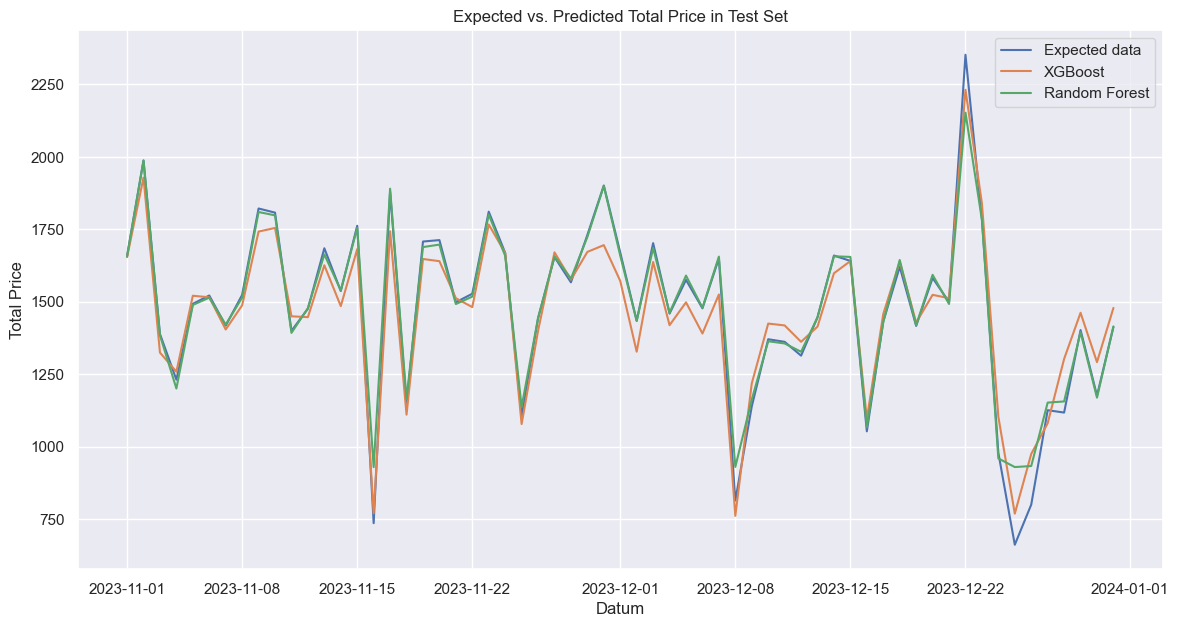

In [170]:

# Plot expected vs. predicted
plt.figure(figsize=(14, 7))

# Ensure lengths match for plotting
test_dates = test['Datum'].reset_index(drop=True)

plt.plot(test_dates, test['TotalPrice'], label='Expected data')
plt.plot(test_dates, y_xgbpredict, label='XGBoost')
plt.plot(test_dates, y_rfpredict, label='Random Forest')

plt.xlabel('Datum')
plt.ylabel('Total Price')
plt.title('Expected vs. Predicted Total Price in Test Set')
plt.legend()
plt.grid(True)
plt.show()

# For Train Set

### RandomForestRegressor

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score 

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]




regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_test, y_test.values.ravel())

# Predict on the test set
y_rfpredict = regrf.predict(X_train)


# Evaluate the algorithm
mae = mean_absolute_error(train['TotalPrice'], y_rfpredict )
mse = mean_squared_error(train['TotalPrice'], y_rfpredict )
rmse = np.sqrt(mse)

r2 = r2_score (train['TotalPrice'], y_rfpredict)


print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2:', r2)


Mean Absolute Error: 44.644342782392926
Mean Squared Error: 8674.668270926055
Root Mean Squared Error: 93.13789921898633
R2: 0.9217708029531051


### xgboost

In [172]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]



# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)


xg_reg.fit(X_test, y_test)

# Predict on the test set
y_xgbpredict = xg_reg.predict(X_train)


# Evaluate the algorithm
mae = mean_absolute_error(train['TotalPrice'], y_xgbpredict)
mse = mean_squared_error(train['TotalPrice'], y_xgbpredict)
rmse = np.sqrt(mse)


r2 = r2_score (train['TotalPrice'], y_rfpredict)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2:', r2)

Mean Absolute Error: 115.76091774975477
Mean Squared Error: 24437.789745995804
Root Mean Squared Error: 156.32590874834474
R2: 0.9217708029531051



 ### Plot expected vs. predicted

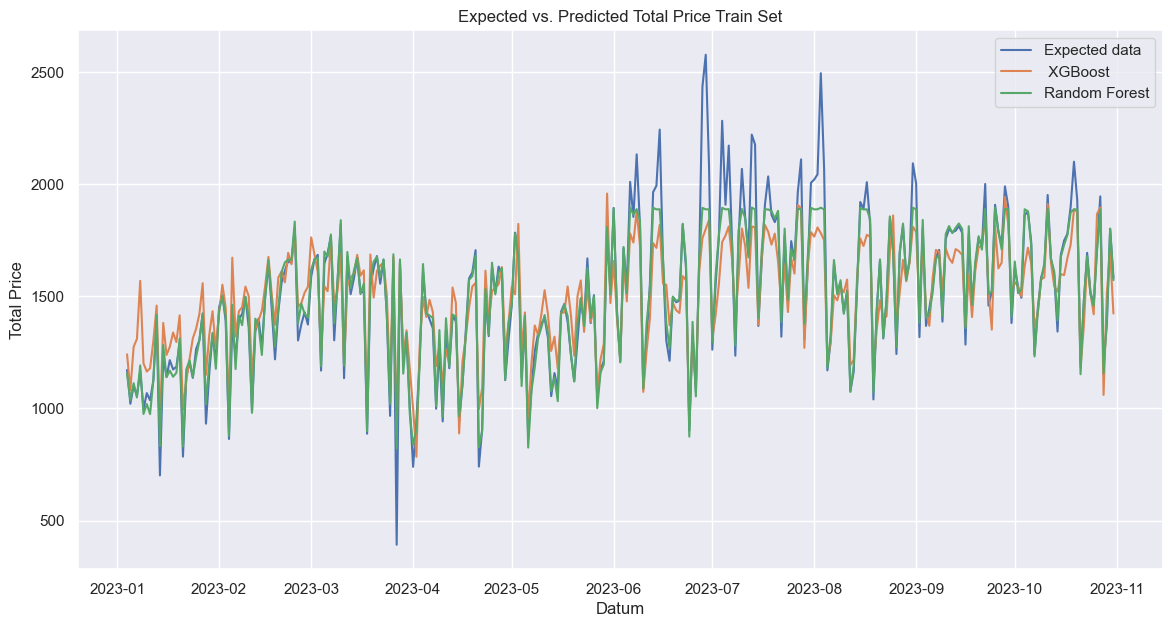

In [173]:
# Plot expected vs. predicted
plt.figure(figsize=(14, 7))

# Ensure lengths match for plotting
train_dates = train['Datum'].reset_index(drop=True)

plt.plot(train_dates, train['TotalPrice'], label='Expected data')
plt.plot(train_dates, y_xgbpredict, label=' XGBoost')
plt.plot(train_dates, y_rfpredict, label='Random Forest')

plt.xlabel('Datum')
plt.ylabel('Total Price')
plt.title('Expected vs. Predicted Total Price Train Set')
plt.legend()
plt.grid(True)
plt.show()

"""
# Prophet Model Training

This section involves preparing the data for the Prophet model and training the model. Prophet is a forecasting tool provided by Facebook for time series data.

1. **Prepare the Data for Prophet**:
   - The 'Datum' and 'TotalPrice' columns are selected from the `daily_cost_pd` DataFrame.
   - The columns are renamed to 'ds' and 'y' as required by Prophet. 'ds' represents the date column, and 'y' represents the target variable (total price).

2. **Initialize and Train the Prophet Model**:
   - The Prophet model is initialized using `model = Prophet()`.
   - The model is then fitted to the prepared DataFrame `prophet_df` using `model.fit(prophet_df)`.

These steps prepare the data in the format required by Prophet and train the model for forecasting the total price.
"""


# Lets see All Togethe

In [178]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming train and test datasets are already loaded and processed
# Drop missing values in the training set
train = train.dropna()
X_train = train.drop(['Datum', 'TotalPrice'], axis=1)
y_train = train['TotalPrice']

X_test = test.drop(['Datum', 'TotalPrice'], axis=1)
y_test = test['TotalPrice']

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]

# Random Forest Regressor
regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_train, y_train)

# XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_rfpredict_test = regrf.predict(X_test)

# Predict on the test set
y_xgbpredict_test = xg_reg.predict(X_test)


# Evaluate the algorithm on the test set
mae_test_xgb = mean_absolute_error(y_test, y_xgbpredict_test)
mse_test_xgb = mean_squared_error(y_test, y_xgbpredict_test)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_test_xgb = r2_score(y_test, y_xgbpredict_test)

# Evaluate the algorithm on the test set
mae_test_rf = mean_absolute_error(y_test, y_rfpredict_test)
mse_test_rf = mean_squared_error(y_test, y_rfpredict_test)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_rfpredict_test)


print('XGBoost Regressor:')
print('Test Set - Mean Absolute Error:', mae_test_xgb)
print('Test Set - Mean Squared Error:', mse_test_xgb)
print('Test Set - Root Mean Squared Error:', rmse_test_xgb)
print('Test Set - R2:', r2_test_xgb)


print('Random Forest Regressor:')
print('Test Set - Mean Absolute Error:', mae_test_rf)
print('Test Set - Mean Squared Error:', mse_test_rf)
print('Test Set - Root Mean Squared Error:', rmse_test_rf)
print('Test Set - R2:', r2_test_rf)


# XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_test, y_test)

# Random Forest Regressor
regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_test, y_test)


# Predict on the train set
y_xgbpredict_train = xg_reg.predict(X_train)
# Predict on the train set
y_rfpredict_train = regrf.predict(X_train)

# Evaluate the algorithm on the train set
mae_train_xgb = mean_absolute_error(y_train, y_xgbpredict_train)
mse_train_xgb = mean_squared_error(y_train, y_xgbpredict_train)
rmse_train_xgb = np.sqrt(mse_train_xgb)
r2_train_xgb = r2_score(y_train, y_xgbpredict_train)

# Evaluate the algorithm on the train set
mae_train_rf = mean_absolute_error(y_train, y_rfpredict_train)
mse_train_rf = mean_squared_error(y_train, y_rfpredict_train)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_rfpredict_train)

print('Train Set - Mean Absolute Error:', mae_train_xgb)
print('Train Set - Mean Squared Error:', mse_train_xgb)
print('Train Set - Root Mean Squared Error:', rmse_train_xgb)
print('Train Set - R2:', r2_train_xgb)

print('Train Set - Mean Absolute Error:', mae_train_rf)
print('Train Set - Mean Squared Error:', mse_train_rf)
print('Train Set - Root Mean Squared Error:', rmse_train_rf)
print('Train Set - R2:', r2_train_rf)

XGBoost Regressor:
Test Set - Mean Absolute Error: 59.86261690733951
Test Set - Mean Squared Error: 5516.31688570701
Test Set - Root Mean Squared Error: 74.27191182208124
Test Set - R2: 0.9423434920045808
Random Forest Regressor:
Test Set - Mean Absolute Error: 24.07445331967222
Test Set - Mean Squared Error: 3119.364247784349
Test Set - Root Mean Squared Error: 55.85126898991955
Test Set - R2: 0.9673964252925705
Train Set - Mean Absolute Error: 115.76091774975477
Train Set - Mean Squared Error: 24437.789745995804
Train Set - Root Mean Squared Error: 156.32590874834474
Train Set - R2: 0.7796170862420765
Train Set - Mean Absolute Error: 44.644342782392926
Train Set - Mean Squared Error: 8674.668270926055
Train Set - Root Mean Squared Error: 93.13789921898633
Train Set - R2: 0.9217708029531051


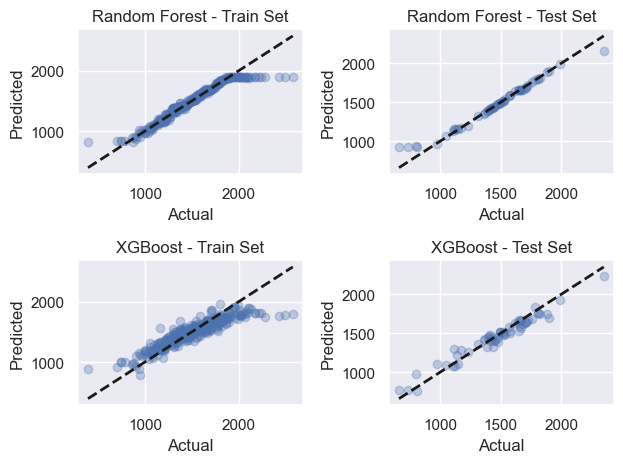

In [179]:
# Random Forest - Train set
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_rfpredict_train, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Random Forest - Train Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest - Test set
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_rfpredict_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest - Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost - Train set
plt.subplot(2, 2, 3)
plt.scatter(y_train, y_xgbpredict_train, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('XGBoost - Train Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost - Test set
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_xgbpredict_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost - Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


# Prophet

In [180]:
# prophet need ds, y
prophet_df=daily_cost_pd[['Datum','TotalPrice']].rename(columns={'Datum':'ds','TotalPrice':'y'})
model=Prophet()
model.fit(prophet_df)

10:49:30 - cmdstanpy - INFO - Chain [1] start processing
10:49:30 - cmdstanpy - INFO - Chain [1] done processing


"""
# Prophet Model Evaluation using Cross-Validation

This section involves evaluating a trained Prophet model using cross-validation and performance metrics. Cross-validation is performed to assess the model's accuracy over a specified horizon.

1. **Import Necessary Libraries**:
   The required libraries `pandas`, `prophet`, and `sklearn.metrics` are imported.

2. **Define Cutoffs for Cross-Validation**:
   - The cutoffs for cross-validation are defined. In this example, the model is trained up to '2023-11-30', and the remaining data is used for testing.

3. **Perform Cross-Validation**:
   - Cross-validation is performed on the Prophet model using the `cross_validation` function with a 30-day horizon starting from the defined cutoff date.

4. **Compute Performance Metrics**:
   - The `performance_metrics` function computes various performance metrics from the cross-validation results.

5. **Calculate R-squared Score**:
   - The R-squared score is calculated using the `r2_score` function to evaluate how well the predicted values approximate the actual values.

6. **Print Evaluation Metrics**:
   - The Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) are printed to assess the model's performance.

These steps provide a comprehensive evaluation of the Prophet model using cross-validation, allowing for an in-depth understanding of the model's accuracy and reliability.
"""


In [181]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import r2_score

cutoffs = pd.to_datetime(['2023-11-30']) # train data up to xx.xx.xx
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='30 days') # test data last month
df_p = performance_metrics(df_cv2)
r2 = r2_score(df_cv2['y'], df_cv2['yhat'])

print('Mean Absolute Error:', df_p['mae'].mean())  
print('Mean Squared Error:', df_p['mse'].mean())  
print('Root Mean Squared Error:', df_p['rmse'].mean())
print('R²:', r2)


  0%|          | 0/1 [00:00<?, ?it/s]

10:49:33 - cmdstanpy - INFO - Chain [1] start processing
10:49:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 322.3951971234097
Mean Squared Error: 174933.606074027
Root Mean Squared Error: 353.9660233752421
R²: -0.4665957110683763


"""
# Plot Expected vs. Predicted Total Price

This section plots the expected vs. predicted total prices using the XGBoost, Random Forest, and Prophet models. The plot visualizes the performance of the models on the test set by comparing the actual values with the predicted values.

1. **Plot Expected Data**:
   - The actual total prices from the test set are plotted. The `tolist()` method converts the pandas Series to a list for plotting.

2. **Plot XGBoost Predictions**:
   - The predicted total prices from the XGBoost model are plotted.

3. **Plot Random Forest Predictions**:
   - The predicted total prices from the Random Forest model are plotted.

4. **Plot Prophet Predictions**:
   - The predicted total prices from the Prophet model are plotted.

5. **Add Legend**:
   - A legend is added to the plot to distinguish between the different models and the expected data.

6. **Display the Plot**:
   - The plot is displayed to visualize the expected vs. predicted total prices, allowing for a direct comparison of model performance on the test set.

This visualization helps to understand how well each model captures the patterns in the data and their prediction accuracy.
"""



 ### Plot expected vs. predicted

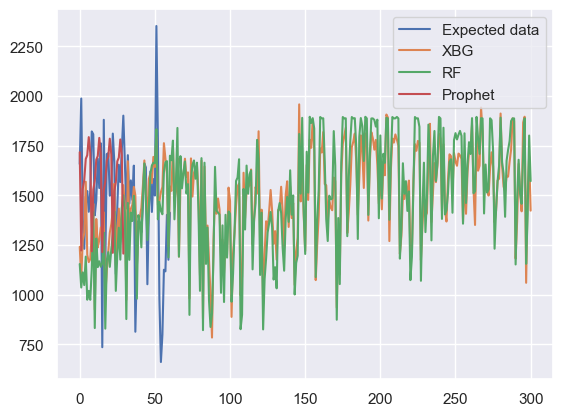

In [182]:

# plot expected vs preducted
plt.plot(test.TotalPrice.tolist(), label='Expected data')
plt.plot(y_xgbpredict, label='XBG')
plt.plot(y_rfpredict, label='RF')
plt.plot(df_cv2.yhat, label='Prophet')
plt.legend()
plt.show()

# Lets Do it again for 10 years 

In [183]:
print(daily_cost_pd)

         Datum  TotalPrice  Total Menge    log_tp  log_tp_diff  \
3   2023-01-04     1171.72        305.0  7.066228     0.236542   
4   2023-01-05     1020.56        281.0  6.928107    -0.138121   
5   2023-01-06     1100.91        300.0  7.003892     0.075786   
6   2023-01-07     1055.70        285.0  6.961959    -0.041933   
7   2023-01-08     1165.03        327.0  7.060502     0.098543   
..         ...         ...          ...       ...          ...   
360 2023-12-27     1125.70        289.0  7.026160     0.341799   
361 2023-12-28     1117.52        311.0  7.018867    -0.007293   
362 2023-12-29     1402.28        371.0  7.245855     0.226988   
363 2023-12-30     1175.96        310.0  7.069840    -0.176015   
364 2023-12-31     1412.96        387.0  7.253442     0.183602   

     log_tp_diff_lag_2  log_tp_diff_lag_1  
3             0.217146          -0.083753  
4            -0.083753           0.236542  
5             0.236542          -0.138121  
6            -0.138121         

"""
# Generate and Resample Synthetic Daily Data

This section generates synthetic daily data for total price and total quantity (menge), creates a DataFrame, and then resamples the data to monthly sums.

1. **Set Random Seed**:
   - The random seed is set using `np.random.seed(0)` to ensure reproducibility of the random values generated.

2. **Generate Date Range**:
   - A date range from January 1, 2023, to December 31, 2033, is created using `pd.date_range`.

3. **Generate Random Data for Total Price and Total Menge**:
   - Random values for total price between 800 and 1500 are generated for each date.
   - Random values for total menge between 200 and 400 are generated for each date.

4. **Create the DataFrame**:
   - A DataFrame is created with the generated dates, total price, and total menge.

5. **Set Index to Datum and Resample to Monthly Data**:
   - The 'Datum' column is set as the index of the DataFrame.
   - The data is resampled to monthly sums using `resample('MS').sum()`, aggregating the total price and total menge by month.

6. **Display the Monthly Data**:
   - The resampled monthly data is printed to the console.

These steps generate a synthetic dataset with daily granularity and then aggregate it to a monthly level for further analysis.
"""


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima


np.random.seed(0)
dates = pd.date_range(start="2023-01-01", end="2033-12-31")
total_price = np.random.uniform(800, 1500, size=len(dates))
total_menge = np.random.uniform(200, 400, size=len(dates))

# Create the DataFrame
daily_cost_pd = pd.DataFrame({
    "Datum": dates,
    "TotalPrice": total_price,
    "Total Menge": total_menge
})

# Resample to monthly data
daily_cost_pd.set_index('Datum', inplace=True)
daily_cost_pd = daily_cost_pd.resample('MS').sum()

# Display the monthly data
print(daily_cost_pd)

              TotalPrice  Total Menge
Datum                                
2023-01-01  37188.715823  8953.550677
2023-02-01  31529.543052  8770.881258
2023-03-01  33754.439403  8740.170480
2023-04-01  35266.217715  9141.694252
2023-05-01  36745.199920  9278.228046
...                  ...          ...
2033-08-01  36227.876413  9081.031344
2033-09-01  32231.334405  8672.933395
2033-10-01  34197.553912  9291.816699
2033-11-01  32774.813018  9238.424047
2033-12-01  34272.198139  9190.425128

[132 rows x 2 columns]


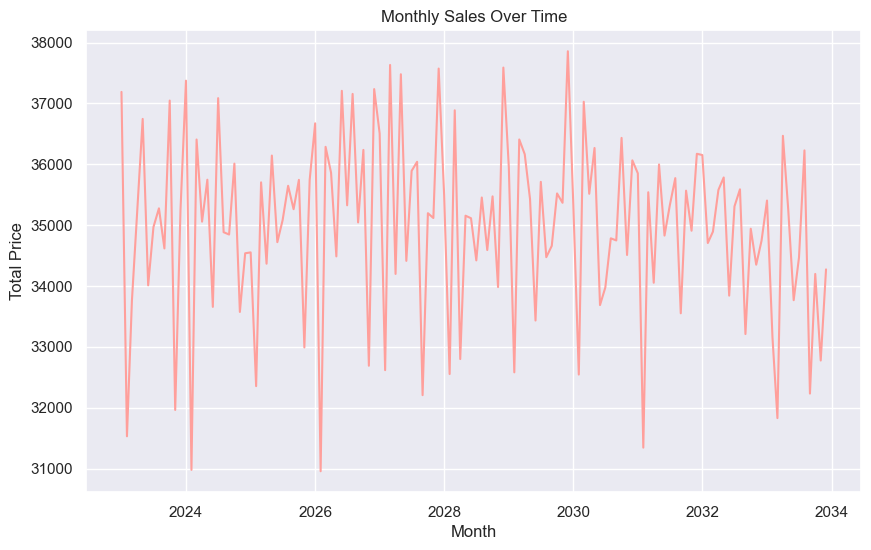

In [213]:
daily_cost_pd = daily_cost_pd.interpolate()
daily_cost_pd.reset_index(inplace=True)

# Plotting the data
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Datum", y='TotalPrice', data=daily_cost_pd, color='#ff9f9b')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

"""
# Seasonal Decomposition of Time Series

This section performs a seasonal decomposition of the time series data using the `seasonal_decompose` function from the `statsmodels` library. Seasonal decomposition is a method to deconstruct a time series into three components: trend, seasonal, and residual.

- **Trend**: Represents the long-term progression of the series. It shows the general direction in which the data is moving over a long period.
- **Seasonal**: Captures the repeating patterns or cycles within the data at specific intervals. This helps in identifying regular fluctuations.
- **Residual**: Represents the remaining variability in the series after removing the trend and seasonal components. It indicates the noise or random variations in the data.

The decomposition is done using an additive model (`model='additive'`), which assumes that the time series is the sum of these three components. The period parameter is set to 12 (`period=12`), which is typically used for monthly data to capture yearly seasonality.

The results of the decomposition are plotted in four subplots:
1. **Observed**: The original time series data.
2. **Trend**: The long-term trend component.
3. **Seasonal**: The seasonal component showing repeating patterns.
4. **Residual**: The residual component showing noise after removing trend and seasonality.

This analysis helps in understanding the underlying patterns in the data, which is crucial for accurate forecasting and decision-making.
"""


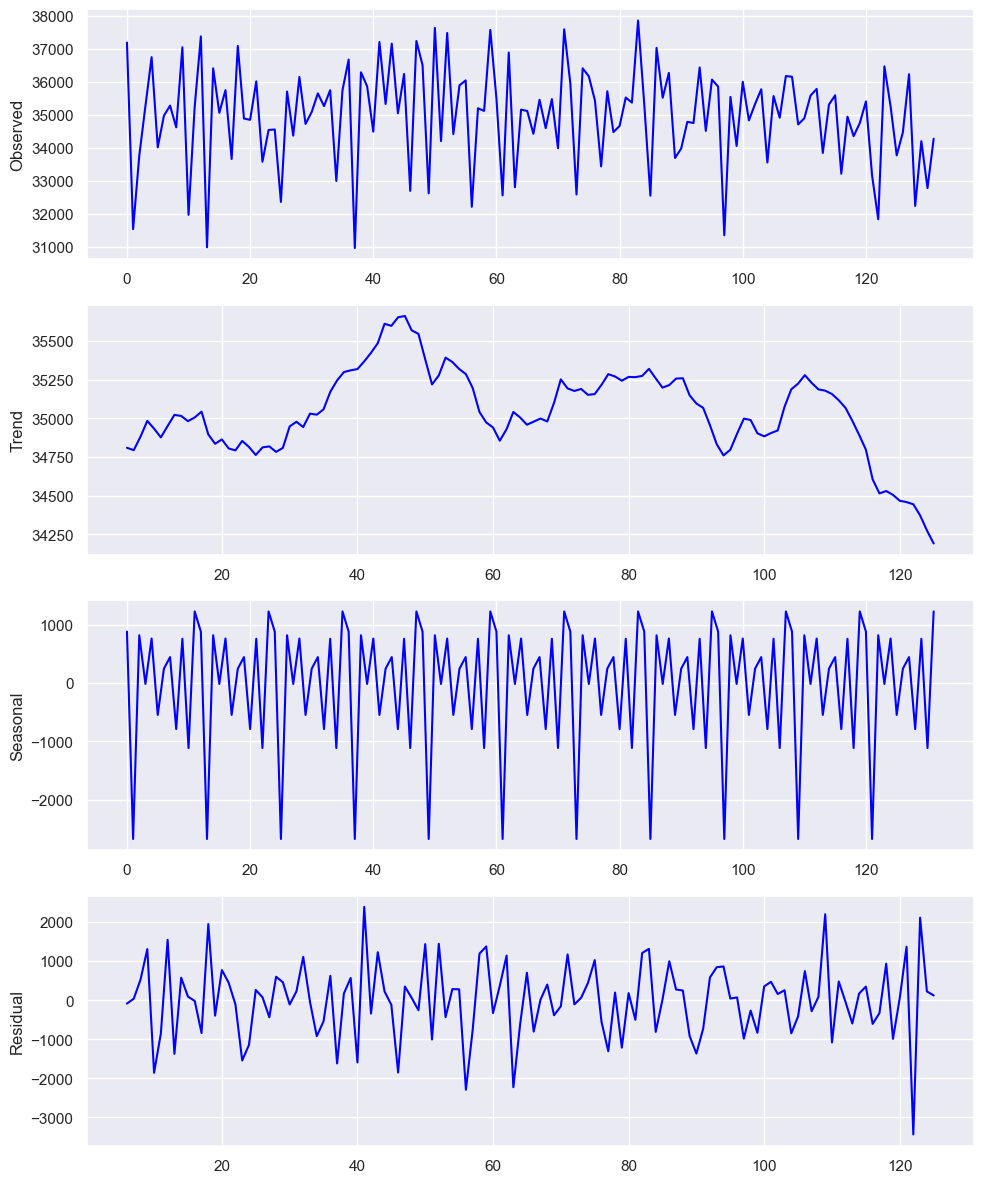

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(daily_cost_pd['TotalPrice'], model='additive', period=12)

# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

result.observed.plot(ax=ax1, color="blue")
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, color='blue')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, color='blue')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, color='blue')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()


"""
# Train/Test Split and Verification

This section splits the resampled monthly data into training and test sets based on a specified cutoff date and prints the sizes and date ranges of these sets.

1. **Ensure the Data Covers the Required Period (2024-2033)**:
   - The data is split into training and test sets to cover the period from 2024 to 2033.

2. **Split the Data into Training and Test Sets**:
   - The `train` DataFrame contains data before January 1, 2024.
   - The `test` DataFrame contains data from January 1, 2024, onwards.

3. **Print the Sizes of the Training and Test Sets**:
   - The number of records in the training and test sets is printed to verify the split.

4. **Print the Date Range of the Test Set**:
   - The minimum and maximum dates in the test set are printed to verify the date range.

These steps ensure that the data is correctly split into training and test sets, covering the required period for analysis and forecasting.
"""


In [187]:
# Ensure the data covers the required period (2024-2033)
train = daily_cost_pd[daily_cost_pd['Datum'] < '2024-01-01']
test = daily_cost_pd[daily_cost_pd['Datum'] >= '2024-01-01']

print(f'Train set size: {len(train)}')
print(f'Test set size: {len(test)}')

print("Test set dates:")
print(test['Datum'].min(), "to", test['Datum'].max())



Train set size: 12
Test set size: 120
Test set dates:
2024-01-01 00:00:00 to 2033-12-01 00:00:00


"""
# PMDARIMA Model Forecasting

This section involves training a PMDARIMA (Auto ARIMA) model and forecasting the target variable for the test dataset period. The `auto_arima` function from the `pmdarima` library is used to automatically identify the best ARIMA model parameters.

Steps:
1. **Import the auto_arima function:**
   The `auto_arima` function is imported from the `pmdarima` library to facilitate model training and forecasting.

2. **Train the PMDARIMA model:**
   The model is trained on the 'TotalPrice' column of the training dataset without seasonal differencing (`seasonal=False`). This means the model does not account for seasonal patterns.

3. **Forecast for the test set period:**
   The model generates forecasts for the test dataset period, where the number of periods to forecast is equal to the length of the test dataset.

4. **Create a DataFrame for the forecasted values:**
   A new DataFrame is created to store the forecasted values alongside the corresponding dates from the test dataset. This DataFrame contains two columns: 'Datum' (dates) and 'PMDARIMA_Forecast' (forecasted values).

5. **Display forecasted values:**
   The first few (`head()`) and last few (`tail()`) rows of the forecasted DataFrame are printed to provide a quick view of the forecast results.

This approach provides an automatic and efficient way to model and forecast time series data, which can be useful for various forecasting tasks and decision-making processes.
"""


In [188]:
from pmdarima import auto_arima

# Train the PMDARIMA model without seasonal differencing
pmdarima_model = auto_arima(train['TotalPrice'], seasonal=False)

# Forecast for the test set period
pmdarima_forecast = pmdarima_model.predict(n_periods=len(test))

# Create a DataFrame for the forecasted values
pmdarima_forecast_df = pd.DataFrame({
    'Datum': test["Datum"].values,
    'PMDARIMA_Forecast': pmdarima_forecast
})

print(pmdarima_forecast_df.head())
print(pmdarima_forecast_df.tail())


        Datum  PMDARIMA_Forecast
12 2024-01-01       34793.173494
13 2024-02-01       34793.167630
14 2024-03-01       34793.161766
15 2024-04-01       34793.155902
16 2024-05-01       34793.150038
         Datum  PMDARIMA_Forecast
127 2033-08-01       34792.499145
128 2033-09-01       34792.493281
129 2033-10-01       34792.487418
130 2033-11-01       34792.481554
131 2033-12-01       34792.475690


"""
# Exponential Smoothing Model Forecasting

This section involves training an Exponential Smoothing model and forecasting the target variable for the test dataset period. The model is fitted using the `ExponentialSmoothing` function from the `statsmodels` library.

Steps:
1. **Import necessary libraries:**
   The required libraries `pandas` and `ExponentialSmoothing` from `statsmodels` are imported.

2. **Split the data into training and test sets:**
   The dataset is split into training and test sets based on the date '2024-01-01'. Data before this date is used for training, while data from this date onwards is used for testing.

3. **Ensure the training period covers at least 12 months:**
   A check is performed to ensure that the training dataset contains at least 12 months of data. If not, a `ValueError` is raised.

4. **Fit the Exponential Smoothing model:**
   The model is trained on the 'TotalPrice' column of the training dataset with an additive trend component (`trend='add'`) and no seasonal component (`seasonal=None`).

5. **Forecast for the test set period:**
   The model generates forecasts for the test dataset period. The number of periods to forecast is equal to the length of the test dataset.



In [189]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure the training period covers at least 12 months
train = daily_cost_pd[daily_cost_pd['Datum'] < '2024-01-01']
test = daily_cost_pd[daily_cost_pd['Datum'] >= '2024-01-01']

# Check the length of the training set
if len(train) < 12:
    raise ValueError("The training set should have at least 12 months of data.")

# Fit the Exponential Smoothing model without seasonal component
ets_model = ExponentialSmoothing(train['TotalPrice'], 
                                 trend='add',
                                 seasonal=None).fit()

# Forecast for the test set period
ets_forecast = ets_model.forecast(steps=len(test))

# Create a DataFrame for the forecasted values
ets_forecast_df = pd.DataFrame({'Datum': test["Datum"],
                                'ETS_Forecast': ets_forecast})

# Display the forecasted values
print(ets_forecast_df.head())
print(ets_forecast_df.tail())


        Datum  ETS_Forecast
12 2024-01-01  35107.062090
13 2024-02-01  35174.369132
14 2024-03-01  35241.676174
15 2024-04-01  35308.983217
16 2024-05-01  35376.290259
         Datum  ETS_Forecast
127 2033-08-01  42847.371964
128 2033-09-01  42914.679006
129 2033-10-01  42981.986049
130 2033-11-01  43049.293091
131 2033-12-01  43116.600133



from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

- Prepare the train and test dataframes
train = pd.DataFrame({
    'unique_id': [1] * len(train),
    'ds': train["Datum"],
    'y': train['TotalPrice']
})

test = pd.DataFrame({
    'unique_id': [1] * len(test),
    'ds': test["Datum"],
    'y': test['TotalPrice']
})

- Initialize and fit the model
sf_forecast = StatsForecast(models=[AutoARIMA(season_length=12)], freq='MS')
sf_forecast.fit(train)

- Predict the future values
sf_prediction = sf_forecast.predict(h=len(test))
sf_prediction.rename(columns={'ds': 'Datum'}, inplace=True)

- Display the forecasted values
print(sf_prediction.head())
print(sf_prediction.tail())


# Test- 

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score 

# Drop missing values in the training set
train = train.dropna()
X_train = train.drop(['Datum','TotalPrice'], axis=1)  
y_train = train['TotalPrice']

X_test= test.drop(['Datum','TotalPrice'], axis=1)  
y_test = test['TotalPrice']



# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]




regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)

regrf.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_rfpredict = regrf.predict(X_test)


# Evaluate the algorithm
mae = mean_absolute_error(test['TotalPrice'], y_rfpredict )
mse = mean_squared_error(test['TotalPrice'], y_rfpredict )
rmse = np.sqrt(mse)

r2 = r2_score (test['TotalPrice'], y_rfpredict)


print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2:', r2)





Mean Absolute Error: 1125.6456814200171
Mean Squared Error: 1928496.9761878198
Root Mean Squared Error: 1388.7033434783039
R2: 0.0968242893305391


In [191]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]



# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)


xg_reg.fit(X_train, y_train)

# Predict on the test set
y_xgbpredict = xg_reg.predict(X_test)


# Evaluate the algorithm
mae = mean_absolute_error(test['TotalPrice'], y_xgbpredict)
mse = mean_squared_error(test['TotalPrice'], y_xgbpredict)
rmse = np.sqrt(mse)


r2 = r2_score (test['TotalPrice'], y_rfpredict)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2:', r2)

Mean Absolute Error: 1607.4235575413234
Mean Squared Error: 3956117.9106667596
Root Mean Squared Error: 1988.9992233952128
R2: 0.0968242893305391


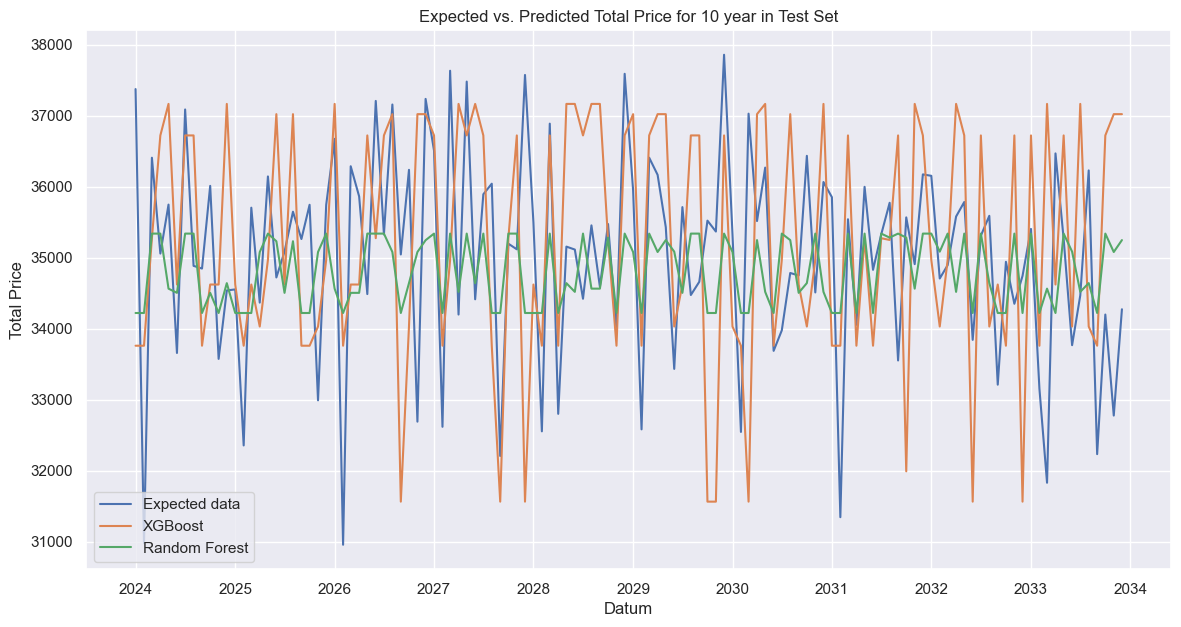

In [192]:
# Plot expected vs. predicted
plt.figure(figsize=(14, 7))

# Ensure lengths match for plotting
test_dates = test['Datum'].reset_index(drop=True)

plt.plot(test_dates, test['TotalPrice'], label='Expected data')
plt.plot(test_dates, y_xgbpredict, label='XGBoost')
plt.plot(test_dates, y_rfpredict, label='Random Forest')

plt.xlabel('Datum')
plt.ylabel('Total Price')
plt.title('Expected vs. Predicted Total Price for 10 year in Test Set')
plt.legend()
plt.grid(True)
plt.show()

# Train

In [193]:
# Train the RandomForestRegressor
regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_test, y_test.values.ravel())

# Predict on the training set
y_rfpredict = regrf.predict(X_train)

# Evaluate the RandomForestRegressor on the training set
mae_rf_train = mean_absolute_error(y_train, y_rfpredict)
mse_rf_train = mean_squared_error(y_train, y_rfpredict)
rmse_rf_train = np.sqrt(mse_rf_train)
r2_rf_train = r2_score(y_train, y_rfpredict)

print('Random Forest Regressor Performance on Training Data:')
print('Mean Absolute Error:', mae_rf_train)
print('Mean Squared Error:', mse_rf_train)
print('Root Mean Squared Error:', rmse_rf_train)
print('R2:', r2_rf_train)

Random Forest Regressor Performance on Training Data:
Mean Absolute Error: 1302.206086967886
Mean Squared Error: 2693844.6417117473
Root Mean Squared Error: 1641.2935879091672
R2: 0.09476135049642631


In [196]:
# XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_test, y_test)


# Predict on the train set
y_xgbpredict_train = xg_reg.predict(X_train)


# Evaluate the algorithm on the train set
mae_train_xgb = mean_absolute_error(y_train, y_xgbpredict_train)
mse_train_xgb = mean_squared_error(y_train, y_xgbpredict_train)
rmse_train_xgb = np.sqrt(mse_train_xgb)
r2_train_xgb = r2_score(y_train, y_xgbpredict_train)

print('Mean Absolute Error:', mae_train_xgb)
print('Mean Squared Error:', mse_train_xgb)
print('Root Mean Squared Error:', rmse_train_xgb)
print('R2:', r2_train_xgb)

Train Set - Mean Absolute Error: 1664.9609691169392
Train Set - Mean Squared Error: 4089858.181808919
Train Set - Root Mean Squared Error: 2022.339779020558
Train Set - R2: -0.37435457109705483


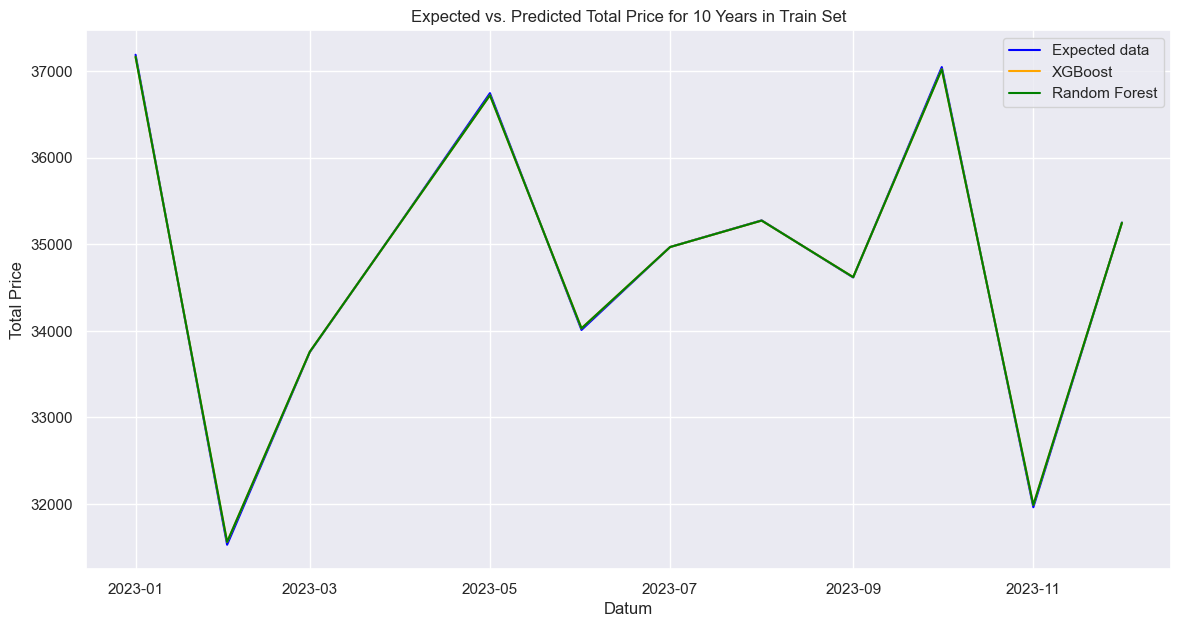

In [211]:
# Plot expected vs. predicted
plt.figure(figsize=(14, 7))

# Ensure lengths match for plotting
train_dates = train['Datum'].reset_index(drop=True)

plt.plot(train_dates, train['TotalPrice'], label='Expected data', color='blue')
plt.plot(train_dates, y_xgbpredict_train, label='XGBoost', color='orange')
plt.plot(train_dates, y_xgbpredict_train, label='Random Forest', color='green')

plt.xlabel('Datum')
plt.ylabel('Total Price')
plt.title('Expected vs. Predicted Total Price for 10 Years in Train Set')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming train and test datasets are already loaded and processed
# Drop missing values in the training set
train = train.dropna()
X_train = train.drop(['Datum', 'TotalPrice'], axis=1)
y_train = train['TotalPrice']

X_test = test.drop(['Datum', 'TotalPrice'], axis=1)
y_test = test['TotalPrice']

# Define the inverse_stationarity function
def inverse_stationarity(diff_series, last_observed_value):
    original_series = np.r_[last_observed_value, diff_series].cumsum()
    return original_series[1:]

# Random Forest Regressor
regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_train, y_train)

# XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_rfpredict_test = regrf.predict(X_test)

# Predict on the test set
y_xgbpredict_test = xg_reg.predict(X_test)


# Evaluate the algorithm on the test set
mae_test_xgb = mean_absolute_error(y_test, y_xgbpredict_test)
mse_test_xgb = mean_squared_error(y_test, y_xgbpredict_test)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_test_xgb = r2_score(y_test, y_xgbpredict_test)

# Evaluate the algorithm on the test set
mae_test_rf = mean_absolute_error(y_test, y_rfpredict_test)
mse_test_rf = mean_squared_error(y_test, y_rfpredict_test)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_rfpredict_test)


print('XGBoost Regressor:')
print('Test Set - Mean Absolute Error:', mae_test_xgb)
print('Test Set - Mean Squared Error:', mse_test_xgb)
print('Test Set - Root Mean Squared Error:', rmse_test_xgb)
print('Test Set - R2:', r2_test_xgb)


print('Random Forest Regressor:')
print('Test Set - Mean Absolute Error:', mae_test_rf)
print('Test Set - Mean Squared Error:', mse_test_rf)
print('Test Set - Root Mean Squared Error:', rmse_test_rf)
print('Test Set - R2:', r2_test_rf)


# XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_test, y_test)

# Random Forest Regressor
regrf = RandomForestRegressor(n_estimators=2000, random_state=10, criterion='absolute_error',
                              min_samples_leaf=3, max_depth=3)
regrf.fit(X_test, y_test)


# Predict on the train set
y_xgbpredict_train = xg_reg.predict(X_train)
# Predict on the train set
y_rfpredict_train = regrf.predict(X_train)

# Evaluate the algorithm on the train set
mae_train_xgb = mean_absolute_error(y_train, y_xgbpredict_train)
mse_train_xgb = mean_squared_error(y_train, y_xgbpredict_train)
rmse_train_xgb = np.sqrt(mse_train_xgb)
r2_train_xgb = r2_score(y_train, y_xgbpredict_train)

# Evaluate the algorithm on the train set
mae_train_rf = mean_absolute_error(y_train, y_rfpredict_train)
mse_train_rf = mean_squared_error(y_train, y_rfpredict_train)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_rfpredict_train)

print('Train Set - Mean Absolute Error:', mae_train_xgb)
print('Train Set - Mean Squared Error:', mse_train_xgb)
print('Train Set - Root Mean Squared Error:', rmse_train_xgb)
print('Train Set - R2:', r2_train_xgb)

print('Train Set - Mean Absolute Error:', mae_train_rf)
print('Train Set - Mean Squared Error:', mse_train_rf)
print('Train Set - Root Mean Squared Error:', rmse_train_rf)
print('Train Set - R2:', r2_train_rf)

XGBoost Regressor:
Test Set - Mean Absolute Error: 1607.4235575413234
Test Set - Mean Squared Error: 3956117.9106667596
Test Set - Root Mean Squared Error: 1988.9992233952128
Test Set - R2: -0.8527742846253994
Random Forest Regressor:
Test Set - Mean Absolute Error: 1125.6456814200171
Test Set - Mean Squared Error: 1928496.9761878198
Test Set - Root Mean Squared Error: 1388.7033434783039
Test Set - R2: 0.0968242893305391
Train Set - Mean Absolute Error: 1664.9609691169392
Train Set - Mean Squared Error: 4089858.181808919
Train Set - Root Mean Squared Error: 2022.339779020558
Train Set - R2: -0.37435457109705483
Train Set - Mean Absolute Error: 1302.206086967886
Train Set - Mean Squared Error: 2693844.6417117473
Train Set - Root Mean Squared Error: 1641.2935879091672
Train Set - R2: 0.09476135049642631


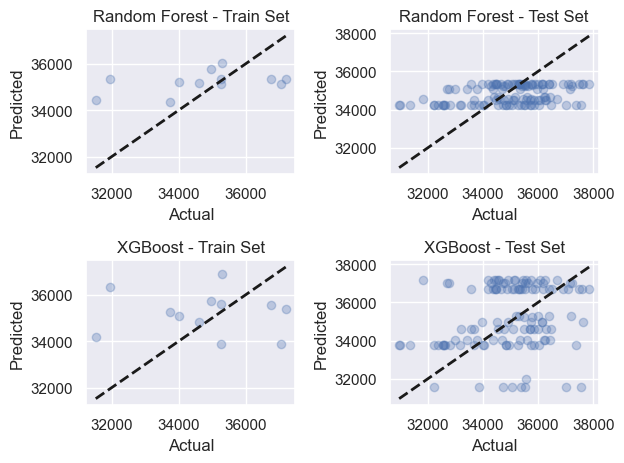

In [199]:
# Random Forest - Train set
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_rfpredict_train, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Random Forest - Train Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest - Test set
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_rfpredict_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest - Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost - Train set
plt.subplot(2, 2, 3)
plt.scatter(y_train, y_xgbpredict_train, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('XGBoost - Train Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost - Test set
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_xgbpredict_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost - Test Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


"""
# Overall Summary and Conclusion

This section summarizes the performance of Random Forest and XGBoost models for both short-term and long-term predictions, highlighting their strengths and areas needing improvement.

## Short-Term Predictions (12 Months):
- Both Random Forest and XGBoost models perform exceptionally well.
- High accuracy and low overfitting in both training and test sets.
- Both models are suitable for predicting sales in the short term.

## Long-Term Predictions (10 Years):
- Both models face challenges with increased variability and uncertainty over the long term.
- Overfitting is more pronounced, with test set performance showing greater variance.
- XGBoost may offer slightly better generalization, but both models require careful tuning and possibly additional techniques (e.g., feature engineering, regularization) for improved long-term forecasting.

# Recommendations

## For Short-Term Predictions:
- Either Random Forest or XGBoost can be used confidently for high accuracy and reliability.

## For Long-Term Predictions:
- Additional methods to mitigate overfitting and improve generalization should be considered.
- XGBoost may provide a slight edge in performance.
- Regular re-evaluation and updates to the model with new data will help maintain accuracy over time.
"""
